#__Project Title :__ Car Accidents Severity Prediction in the USA

### __Team Memebers__ : 
###Dhanashree Mehta
###Shweta Avachat
###Harshada Dhawade


>  #### In this Milestone, We are going to Explore the countrywide car accident dataset of the US. The accident data are collected from February 2016 to Dec 2020, there are about **3 million** accident records in this dataset. We are going to analyse the data to explore Data Preprocesing, Data Cleaning and Data Visualizaion.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##  1. Import Data and Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv("/content/drive/MyDrive/CIS 690 Project/US_Accidents_Dec20_updated.csv")
df = data.copy()
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


# 2. Data Preparation

>    #### Before data exploration, first we should prepare the data for the analysis. We'll first do data cleaning. we'll check for the null values and remove all the columns with a lot of null values. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

> #### __Inference :__ We can see that we only have 46 columns, taking 542 MB of memory, We'll try to reduce this as much we can after we deal with the null values.

## 1. Data Cleaning

> #### We'll first see how many null values are there in the dataset. We'll drop the columns containing large number of null values since they won't be much useful. We'll also drop the columns which are not too important.

In [5]:
df.isna().sum().sort_values(ascending = False)

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
City                          83
Nautical_Twilight             83
Astronomical_Twilight         83
Civil_Twilight                83
Sunrise_Sunset                83
Amenity                        0
Bump                           0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Street    

> #### __Inference :__There are a lot of null values. Some columns have definitely way more null columns, They should be discarded completely. But first let's visualize the null values of the data for better understanding. 

In [6]:
null_values = df.isna().sum().reset_index()
null_values.columns = ["Columns", "Null_count"]
null_values["% Null_values"] = (null_values["Null_count"]*100)/len(df)
null_values.sort_values(by = "Null_count",ascending = False, inplace = True)
Missing_values = null_values[null_values["Null_count"] != 0]
Missing_values

,Columns,Null_count,% Null_values
10,Number,1046095,69.000715
28,Precipitation(in),510549,33.675953
22,Wind_Chill(F),449316,29.637007
27,Wind_Speed(mph),128862,8.499773
23,Humidity(%),45509,3.001786
25,Visibility(mi),44211,2.916170
29,Weather_Condition,44007,2.902714
21,Temperature(F),43033,2.838469
26,Wind_Direction,41858,2.760965
24,Pressure(in),36274,2.392643


In [7]:
sns.set_style("darkgrid")

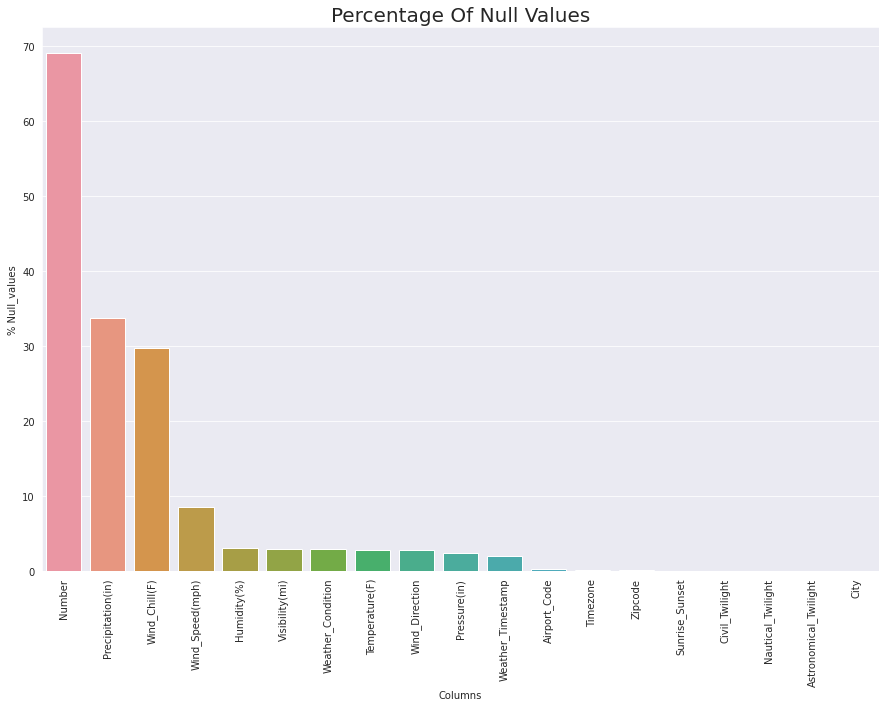

In [8]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
plt.title("Percentage Of Null Values",fontsize= 20)
sns.barplot(x = "Columns", y = "% Null_values", data = Missing_values )

> #### __Inference :__ The top 3 columns with most null values have more than 40% of null values so they're useless. since the top 6 columns containing most null values are not that important for our analysis, We'll drop them .

In [9]:
df.drop(axis = 1, columns = ['Number','Precipitation(in)','Wind_Chill(F)','Wind_Speed(mph)','End_Lat','End_Lng'], inplace = True)

> #### We still have null values in our dataset. But we don't require all the  columns for our analysis. We'll remove all the unncessary columns containing null values.

In [10]:
df.drop(axis = 1, columns = ['Wind_Direction','Pressure(in)','Weather_Timestamp','Airport_Code','Timezone','Zipcode','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], inplace = True)

> #### We'll now fill the remaining coulmns with appropriate values.

#### i. Impute the missing values of numerical columns:

In [11]:
df["Temperature(F)"].fillna(df["Temperature(F)"].median(), inplace = True)
df["Humidity(%)"].fillna(df["Humidity(%)"].median(), inplace = True)
df["Visibility(mi)"].fillna(df["Visibility(mi)"].median(), inplace = True)

#### ii. Impute the missing values of categorical columns:

In [12]:
df["Weather_Condition"].fillna(df["Weather_Condition"].mode()[0], inplace = True)
df["Sunrise_Sunset"].fillna(df["Sunrise_Sunset"].mode()[0], inplace = True)

In [13]:
df["City"].fillna(value = "None", inplace = True)

In [14]:
df.isna().sum().sort_values(ascending = False)

Sunrise_Sunset       0
Turning_Loop         0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
Side                 0
City                 0
County               0
State                0
Country              0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
ID                   0
dtype: int64

#### __Inference :__ As we can see we have deal with all the null values. We have a clean data for our analysis. Now let's do some memory optimization

## 2. Memory Optimization

> #### There are lots of column with a string datatype which could be converted into categorial datatype columns for performance improvement. Let’s take a look at which columns might be good candidates for a categorical datatype. 

In [15]:
df.head(3).transpose()

,0,1,2
ID,A-2716600,A-2716601,A-2716602
Severity,3,2,2
Start_Time,2016-02-08 00:37:08,2016-02-08 05:56:20,2016-02-08 06:15:39
End_Time,2016-02-08 06:37:08,2016-02-08 11:56:20,2016-02-08 12:15:39
Start_Lat,40.1089,39.8654,39.1027
Start_Lng,-83.0929,-84.0628,-84.5247
Distance(mi),3.23,0.747,0.055
Description,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,At OH-4/OH-235/Exit 41 - Accident.,At I-71/US-50/Exit 1 - Accident.
Street,Outerbelt E,I-70 E,I-75 S
Side,R,R,R


> #### __Inference :__ There are many boolean datatypes as well, we'll have to be careful while selecting the columns.

In [16]:
for col in df.columns:
    if df[col].nunique() < 2100 and df[col].nunique() > 10 and df[col].dtype== "object": 
        df[col] = df[col].astype("category")

In [17]:
df["Country"] = df["Country"].astype("category")

In [18]:
df["Side"] = df["Side"].astype("category")

> #### Now let's convert the datatypes of columns Start_Time and End_Time as these should be in datetime datatypes for our analysis.


In [19]:
convert_columns1 = ["Start_Time","End_Time"]
df[convert_columns1] = df[convert_columns1].astype("datetime64[ns]")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 32 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   ID                 1516064 non-null  object        
 1   Severity           1516064 non-null  int64         
 2   Start_Time         1516064 non-null  datetime64[ns]
 3   End_Time           1516064 non-null  datetime64[ns]
 4   Start_Lat          1516064 non-null  float64       
 5   Start_Lng          1516064 non-null  float64       
 6   Distance(mi)       1516064 non-null  float64       
 7   Description        1516064 non-null  object        
 8   Street             1516064 non-null  object        
 9   Side               1516064 non-null  category      
 10  City               1516064 non-null  object        
 11  County             1516064 non-null  category      
 12  State              1516064 non-null  category      
 13  Country            1516064 

> #### __Inference :__ We've reduced the memory usage by 790 MB to 343.8 MB after removing all the null values and converting few columns to categorical datatype.

> ####  We're all done with the data preparation. Now let's explore our data.

## 3. Explore The Data

> ### In this, We'll analyse each column of our dataset. There are many columns worth exploring like State, City, Street, County, Start_Time, Temperature(F), Weather_Condition, Visibility(mi). 



In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,1516064.0,2.238630,0.608148,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,1516064.0,36.900558,5.165653,24.570222,33.854225,37.351130,40.725927,49.000580
Start_Lng,1516064.0,-98.599194,18.496022,-124.497567,-118.207575,-94.381003,-80.874690,-67.113167
Distance(mi),1516064.0,0.587262,1.632659,0.000000,0.000000,0.178000,0.594000,155.186000
Temperature(F),1516064.0,59.624773,18.013491,-89.000000,48.000000,61.000000,73.000000,170.600000
Humidity(%),1516064.0,64.759873,22.915189,1.000000,49.000000,68.000000,84.000000,100.000000
Visibility(mi),1516064.0,9.157075,2.850421,0.000000,10.000000,10.000000,10.000000,140.000000


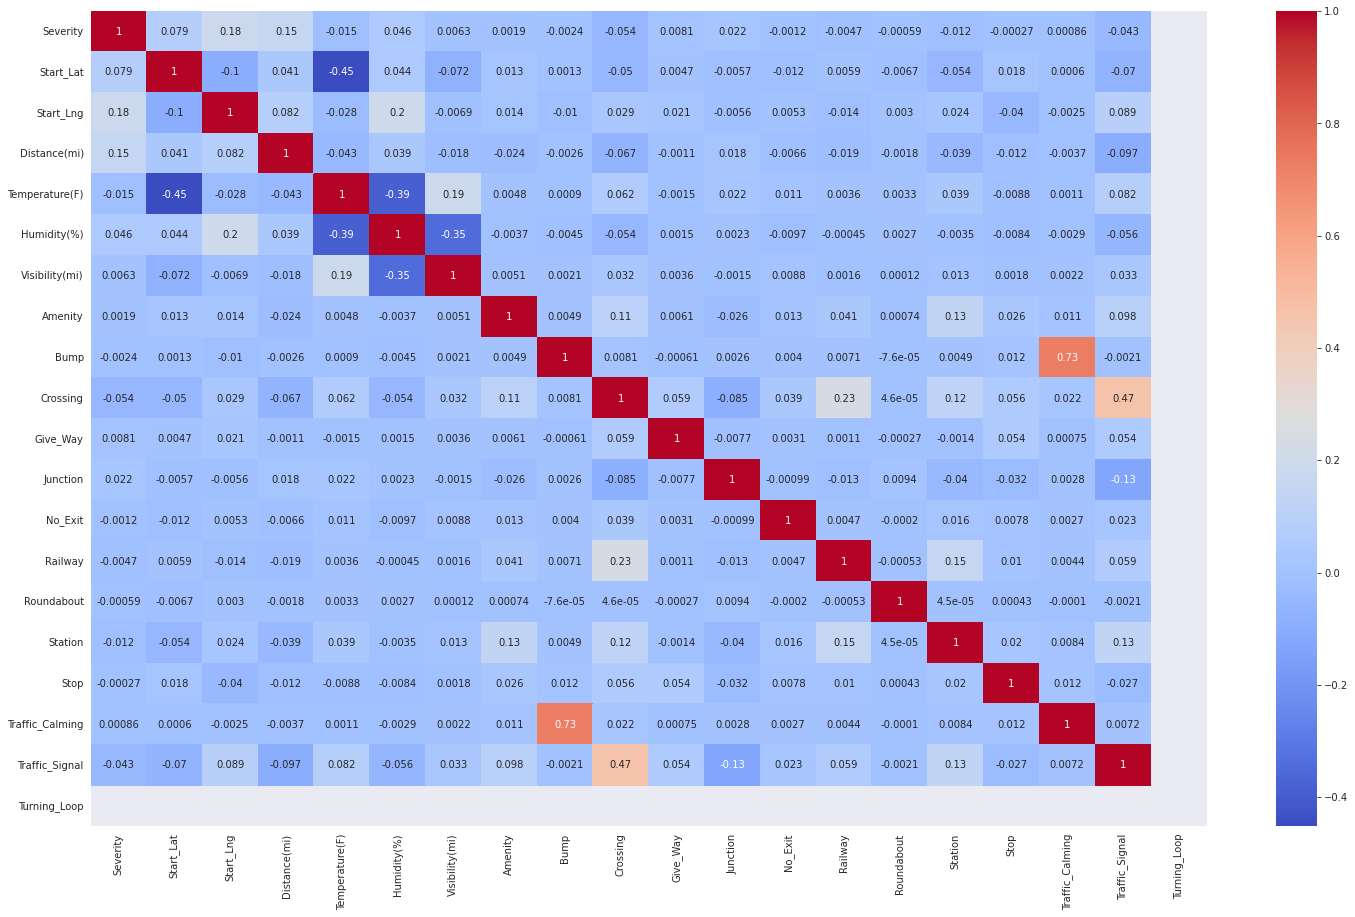

In [21]:
plt.figure(figsize = (25,15))
Var_Corr = df.corr()
sns.heatmap(Var_Corr, cmap = "coolwarm", xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### a) State

> #### The US have 50 states in the total. We have the records of 49 states.

> #### Let's plot a bar plot to understand which state has the most accidents records.

Text(0.5, 1.0, 'Accidents by States')

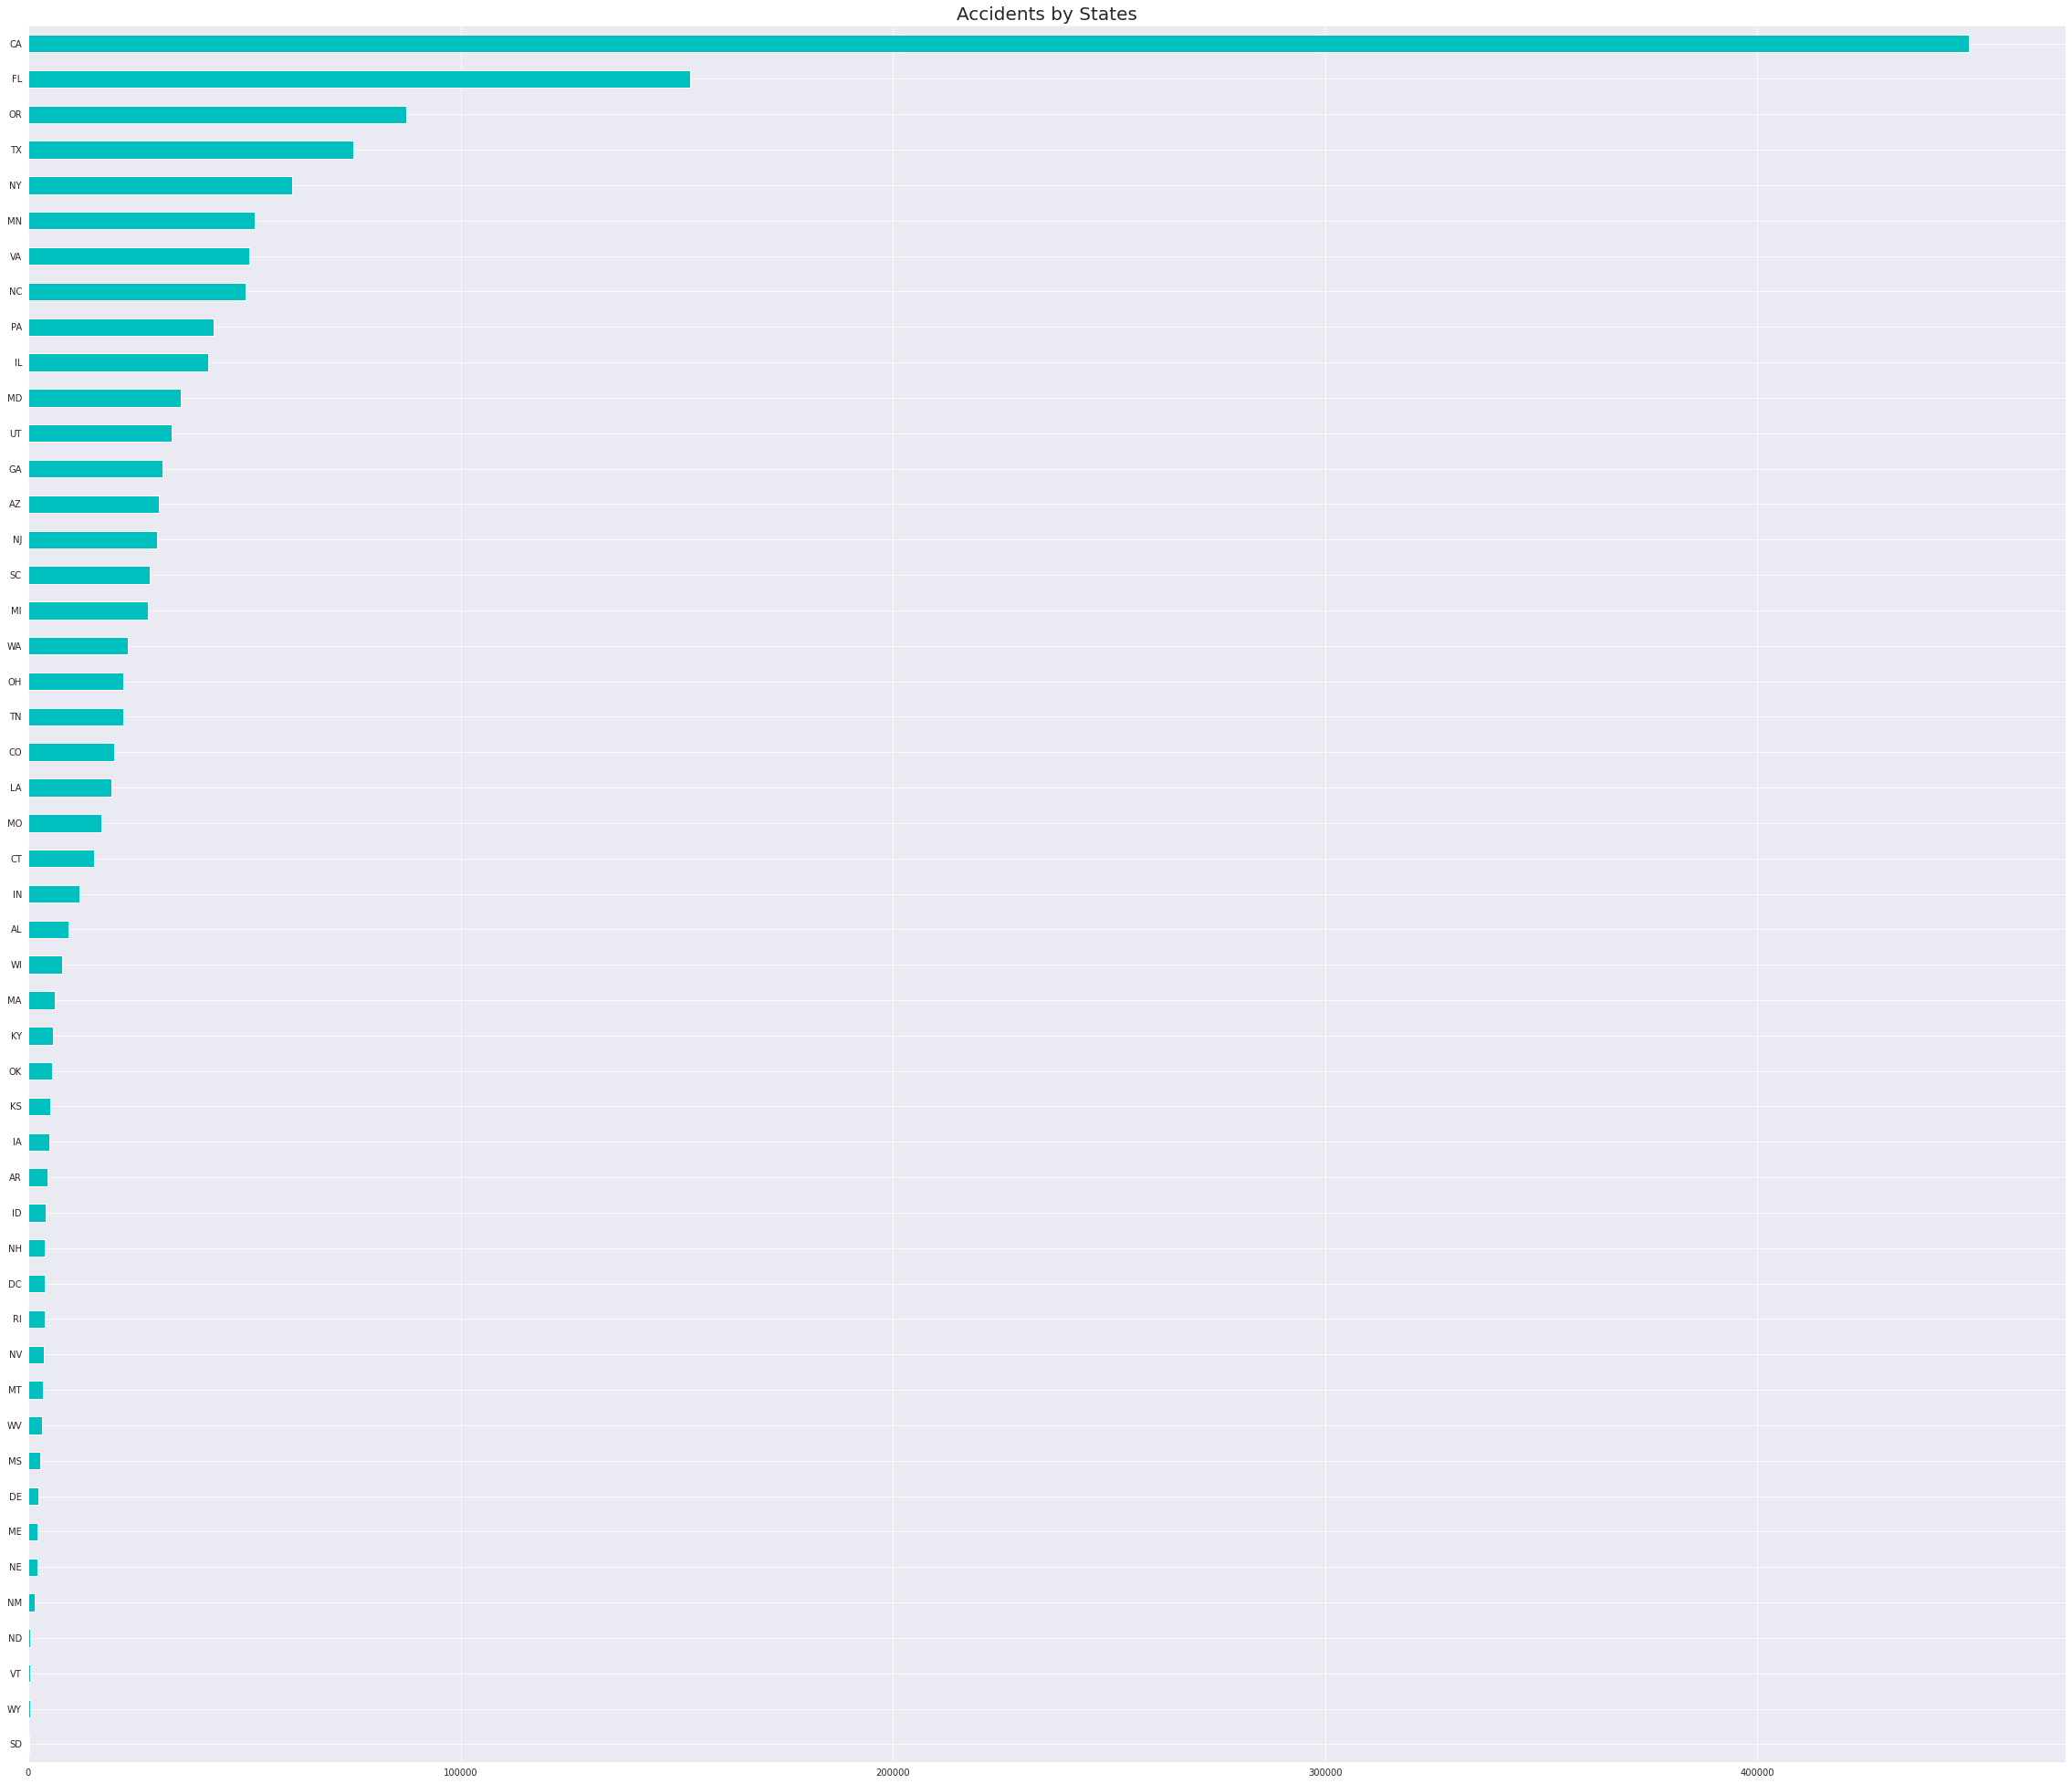

In [22]:
plt.figure(figsize = (40,35))
df["State"].value_counts(ascending = True).plot(kind = "barh", color = "c")
plt.title("Accidents by States", fontsize = 20)

> #### __Inferences :__ We can clearly see that California (CA) has the highest number of Accidents by a large margine with Florida (FL) which has the second most accident records. 

Text(0.5, 1.0, 'Percentage of Accidents by States')

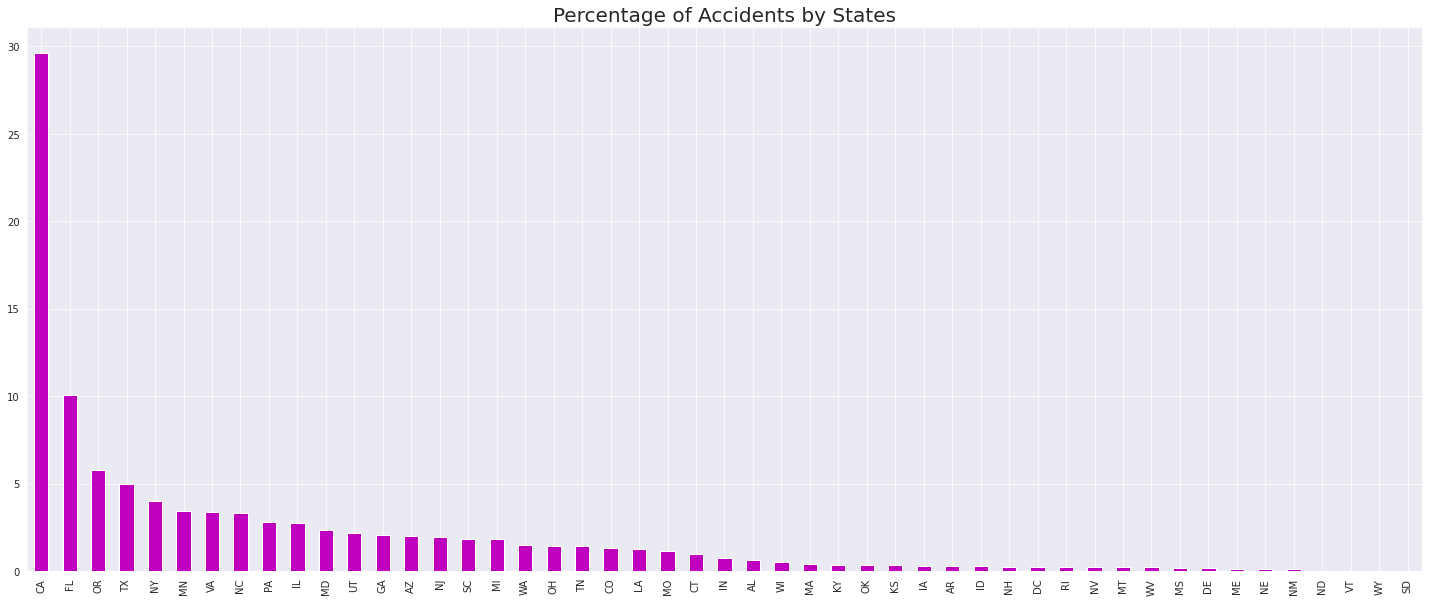

In [23]:
plt.figure(figsize = (25,10))
(df["State"].value_counts(ascending = False)*100/len(df)).plot(kind = "bar", color = "m")
plt.title("Percentage of Accidents by States", fontsize = 20)

> #### __Inferences :__ In these past 5 years **29%** of accidents have happened in the state of California which is signifiant. Following that **10%** in Florida and **5%** in Texas.

### b) City

In [24]:
cities = df["City"].value_counts(ascending = False).reset_index()
cities.columns = ["City", "Number_of_Accidents"]
cities["% of_Accidents"] =(cities["Number_of_Accidents"]*100)/len(df)
cities.sort_values(by = "Number_of_Accidents",ascending = False, inplace = True)
cities_accidents = cities.head(50)
cities_accidents.head()

,City,Number_of_Accidents,% of_Accidents
0,Los Angeles,39984,2.637356
1,Miami,36233,2.389939
2,Charlotte,22203,1.464516
3,Houston,20843,1.374810
4,Dallas,19497,1.286028


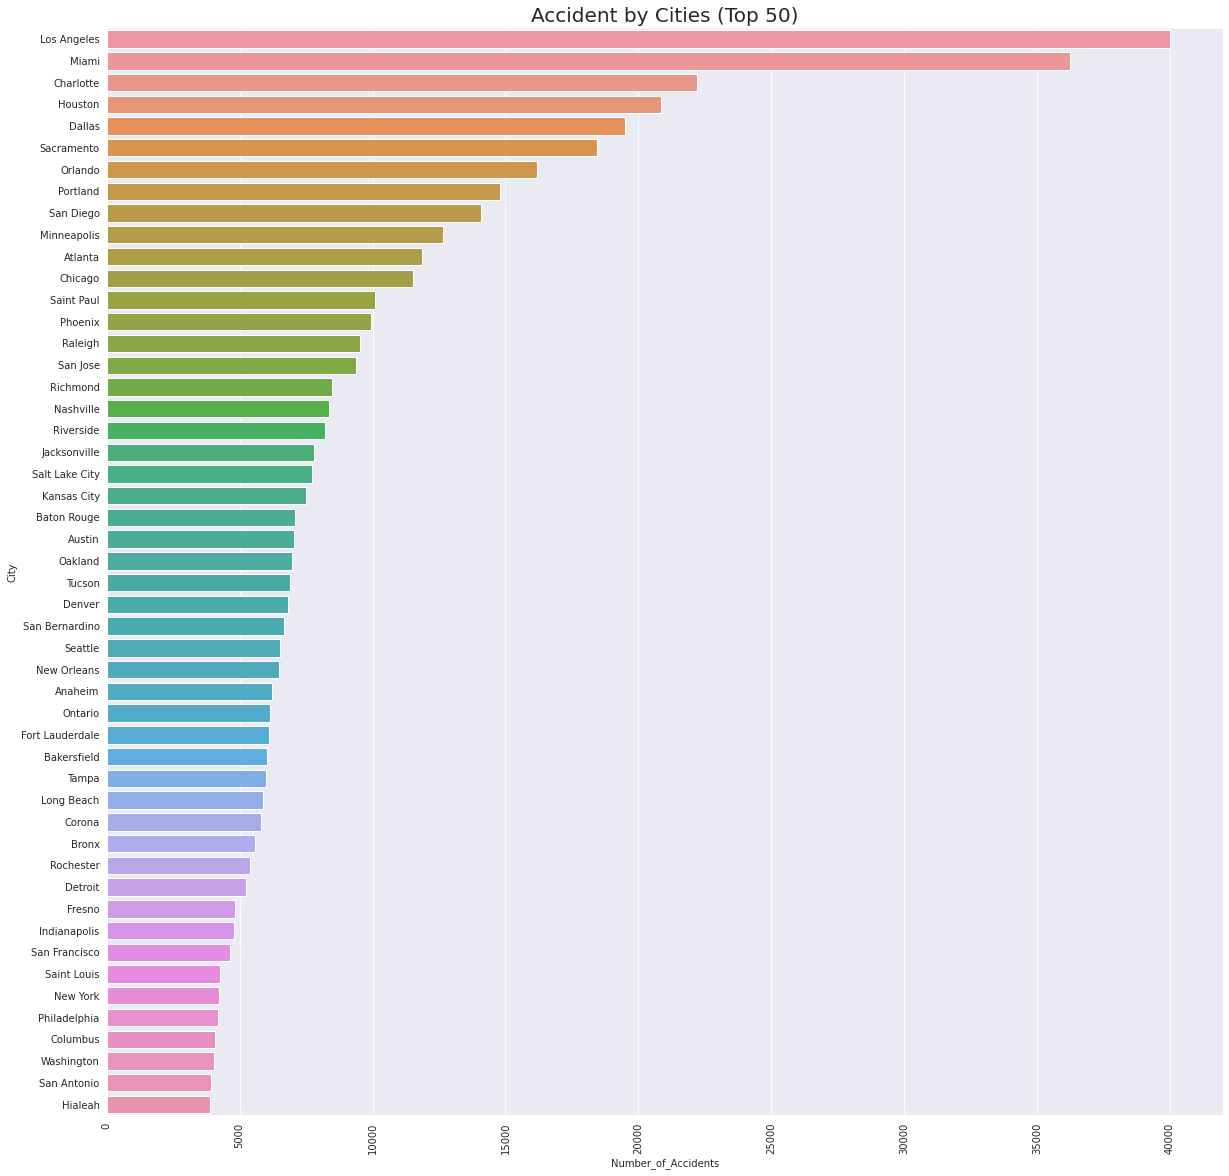

In [25]:
plt.figure(figsize=(20,20))
plt.xticks(rotation = 90)
plt.title("Accident by Cities (Top 50)",fontsize= 20)
sns.barplot(y = "City", x = "Number_of_Accidents", data = cities_accidents )

> #### __Inferences :__ Los Angeles has the highest number of accidents with houston being second with almost similar number of accidents. Top 10 cities account for the most of the accidents.

In [26]:
len(cities)

10658

In [27]:
cities["% of_Accidents"].head(1000).sum()

79.35931464634739

In [28]:
cities["% of_Accidents"].head(100).sum()

40.95750575173607

In [29]:
cities["% of_Accidents"].head(10).sum()

14.175391012516622

> #### __Inferences :__ We have **10658** cities. Of that Top 1000 cities account for **79%** of the Accidents, Top 100 cities account for **41%** of the Accidents and Top 10 cities account for **14%** of the Accidents.

### c) Street

In [30]:
streets = df["Street"].value_counts(ascending = False).reset_index()
streets.columns = ["Street", "Number_of_Accidents"]
streets["% of_Accidents"] =(streets["Number_of_Accidents"]*100)/len(df)
streets.sort_values(by = "Number_of_Accidents",ascending = False, inplace = True)
streets_accidents = streets.head(50)
streets_accidents.head()

,Street,Number_of_Accidents,% of_Accidents
0,I-5 N,26645,1.757512
1,I-95 N,22407,1.477972
2,I-95 S,19406,1.280025
3,I-5 S,18432,1.215780
4,I-10 E,14681,0.968363


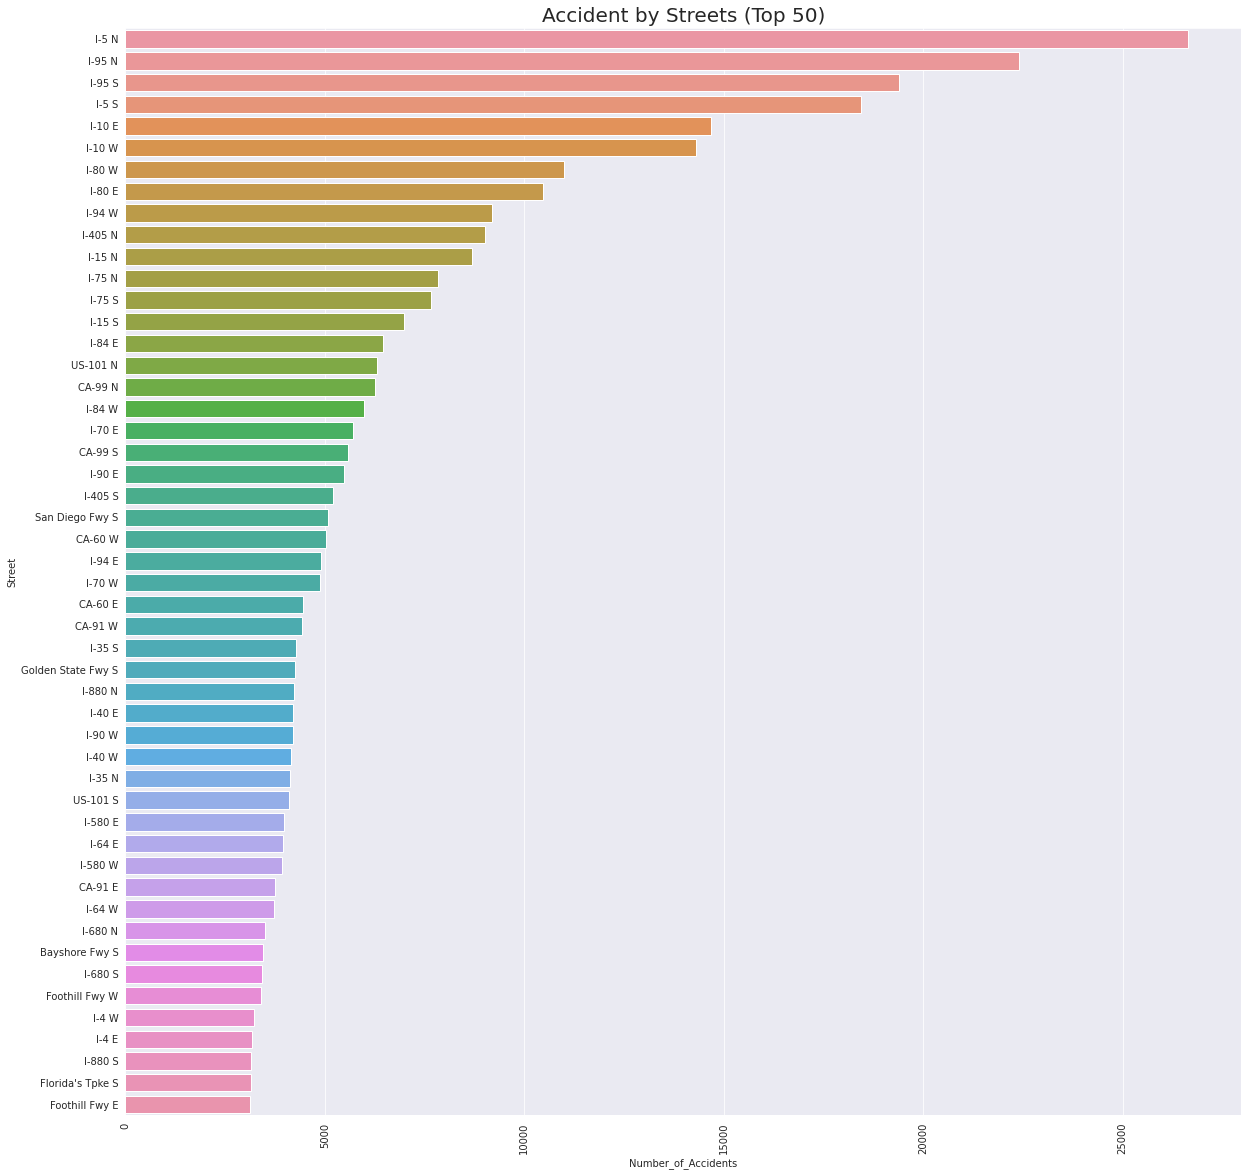

In [31]:
plt.figure(figsize=(20,20))
plt.xticks(rotation = 90)
plt.title("Accident by Streets (Top 50)",fontsize= 20)
sns.barplot(y = "Street", x = "Number_of_Accidents", data = streets_accidents )

> #### __Inferences :__ I-5N had the most number of accidents, following that I-95N, I-95S. Steets follow the same trend as cities with top streets having the most number of accidents.

In [32]:
len(streets)

93048

In [33]:
streets["% of_Accidents"].head(10000).sum()

83.44298129894253

In [34]:
streets["% of_Accidents"].head(1000).sum()

57.56320313654305

In [35]:
streets["% of_Accidents"].head(100).sum()

30.164887498153107

> #### __Inferences :__ We have **93048** Streets. Of that Top 10000 Streets account for **83%** of the Accidents, Top 1000 Streets account for **57%** of the Accidents and Top 100 Streets account for **30%** of the Accidents.

### d) Start_Time

> #### Lets' add a year column

In [36]:
df["Year"] = df["Start_Time"].dt.year

Text(0.5, 1.0, 'Yearly Accidents Trend')

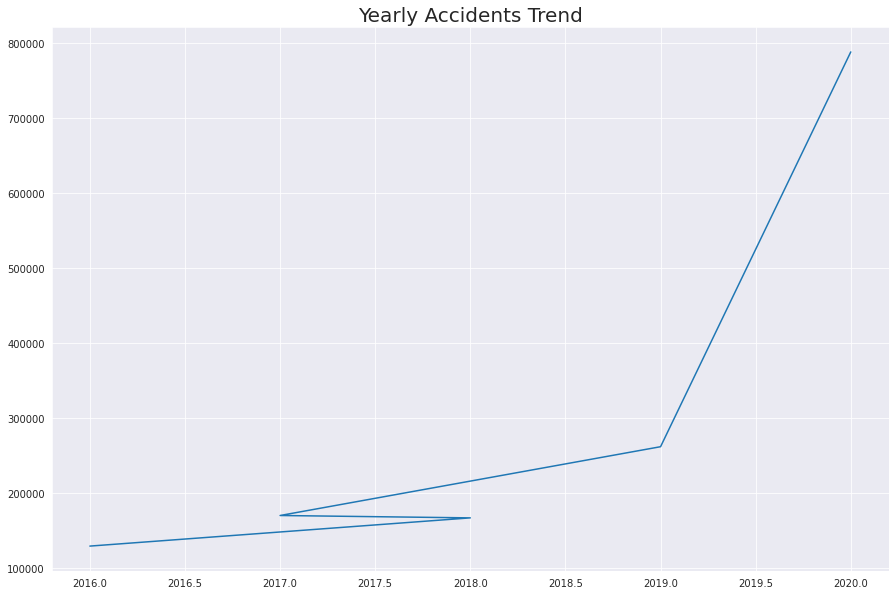

In [37]:
plt.figure(figsize = (15,10))
df["Start_Time"].dt.year.value_counts().plot(kind = "line")
plt.title("Yearly Accidents Trend", fontsize = 20)

> #### __Inferences :__ There's an increasing trend in 2020. The accidents are growing rapidly in numbers.

Text(0.5, 1.0, 'Percentage of yearly Accidents')

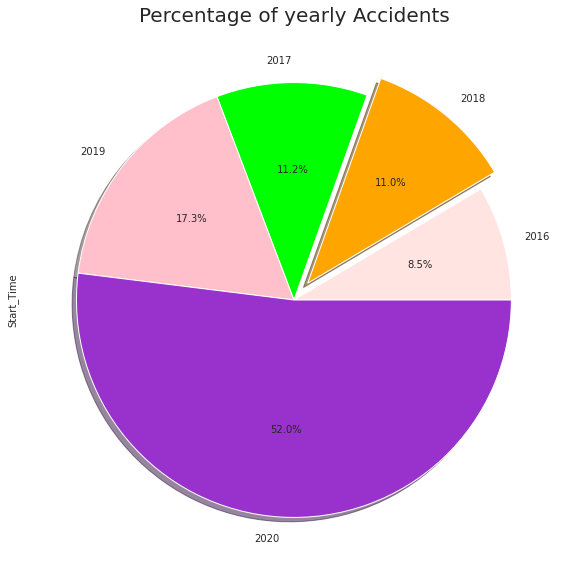

In [38]:
plt.figure(figsize = (25,10))
explode = (0, 0.1, 0, 0, 0)
colors = ['mistyrose','orange', 'lime', 'pink', 'darkorchid']
(df["Start_Time"].dt.year.value_counts(ascending = True)*100/len(df)).plot(kind = "pie", autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True)
plt.title("Percentage of yearly Accidents", fontsize = 20)

> #### __Inferences :__ Out of all the accident records **52%** of accidents have happened in 2020. Accidents are increasing at an alarming rate every year.

Text(0.5, 1.0, 'Percentage of yearly Accidents by States')

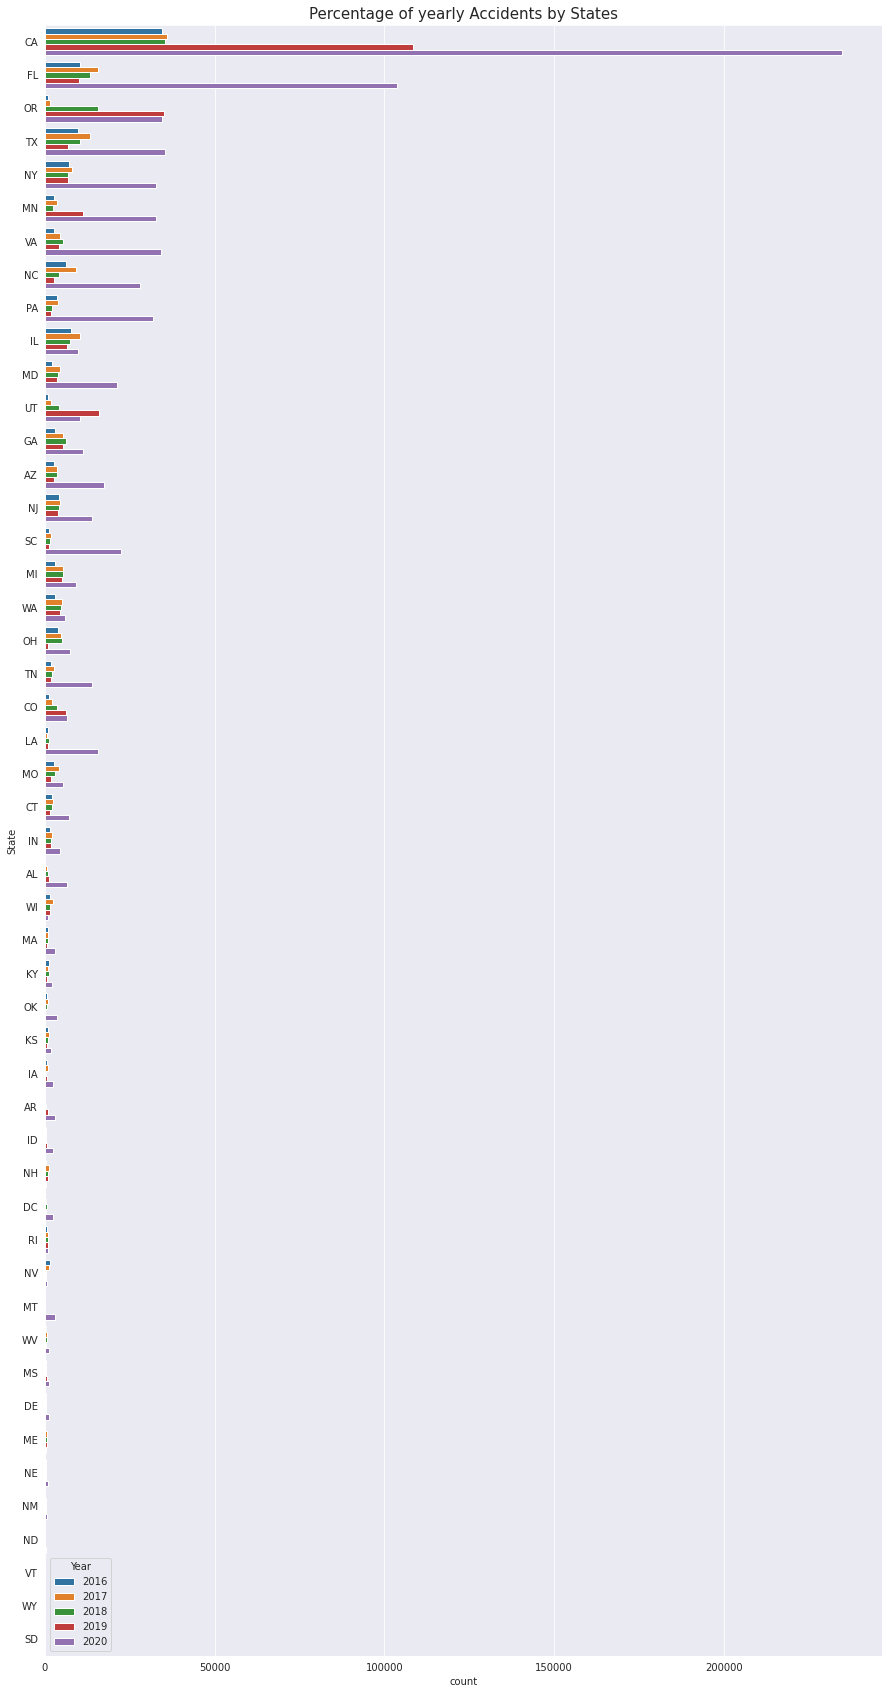

In [39]:
plt.figure(figsize = (15,30))
sns.countplot(y = "State", hue="Year", data=df, order = df["State"].value_counts().index)
plt.title("Percentage of yearly Accidents by States", fontsize = 15)

> #### __Inferences :__ 2020 have had most of the accidents for all the States. For Florida it seems the number has increased **3 times** than the previous year. California also had **1.6 times** increase over the previous year. PA, VA also had significant increase in 2020. 

> #### Let's add a month column

In [40]:
df["Month"] = df["Start_Time"].dt.month_name()

Text(0.5, 1.0, 'Percentage of Monthly Accidents')

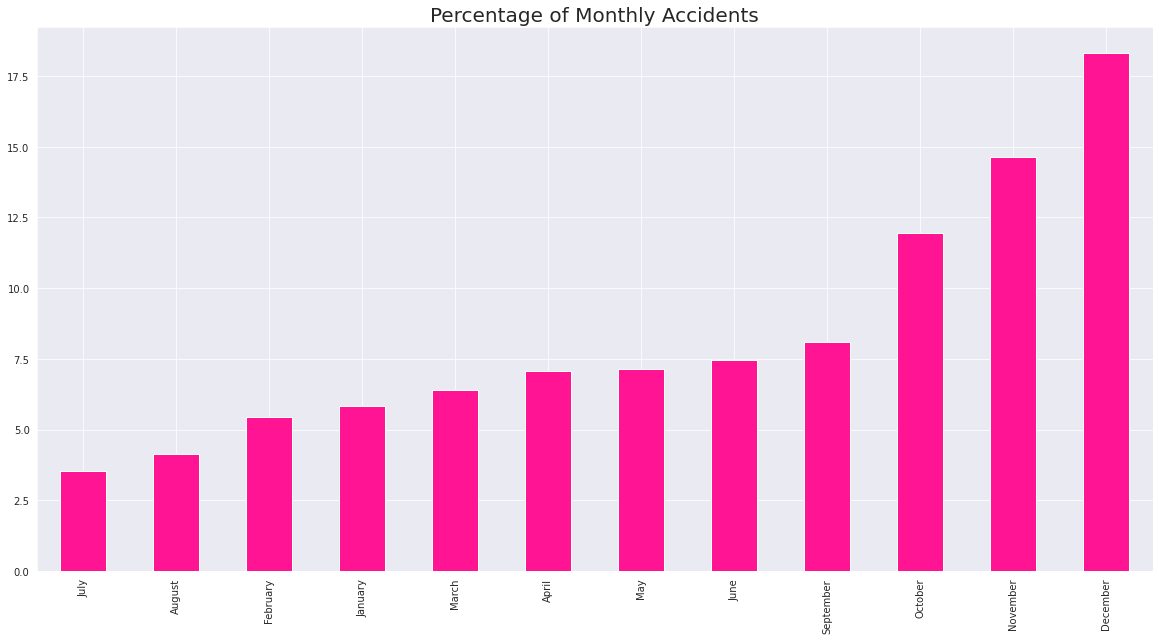

In [41]:
plt.figure(figsize = (20,10))
(df["Start_Time"].dt.month_name().value_counts(ascending = True)*100/len(df)).plot(kind = "bar", color = "deeppink")
plt.title("Percentage of Monthly Accidents", fontsize = 20)

> #### __Inferences :__ Most of the accidents happen during last quarter of the year with December having the most accidents. July registered least number of accidents.

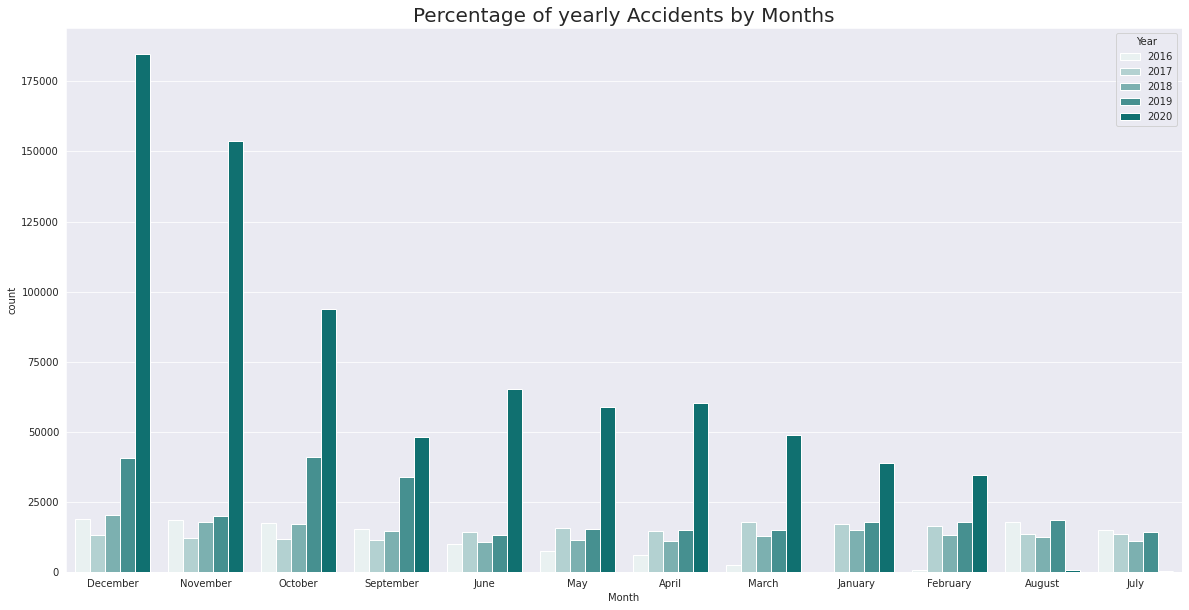

In [42]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Month", hue="Year", data=df, order = df["Month"].value_counts().index, color='teal')
plt.title("Percentage of yearly Accidents by Months", fontsize = 20)
plt.show()

> #### __Inferences :__ For December and November, 2020 had more accidents approx **3 times** that of the previous year. For July and August, it seems the number has decreased by **half**. It's interesting to note that except 2020, all months had balanced number of accidents throughout all years.

In [43]:
df["Day_of_Week"] = df["Start_Time"].dt.day_name()

Text(0.5, 1.0, 'Percentage of Accidents by Days')

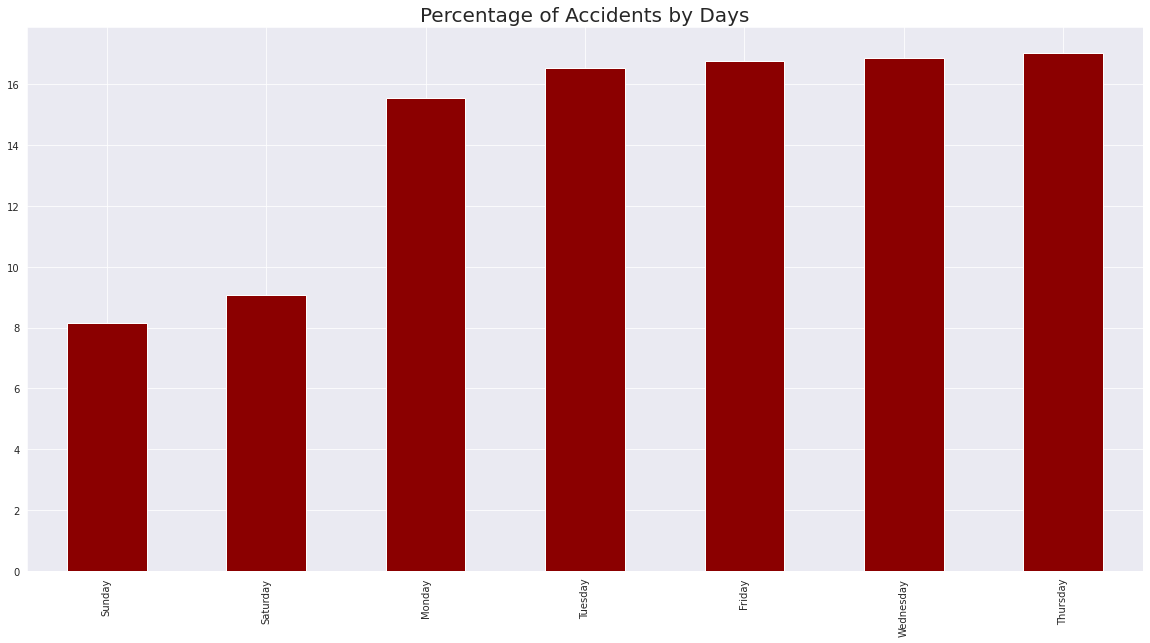

In [44]:
plt.figure(figsize = (20,10))
(df["Start_Time"].dt.day_name().value_counts(ascending = True)*100/len(df)).plot(kind = "bar", color = "darkred")
plt.title("Percentage of Accidents by Days", fontsize = 20)

> #### __Inferences :__ Saturday and Sundays have least number of Accidents. Weekends are off days for most of the working people, that could be the reason behind less accidents. We can get clear understanding about this when we plot a graph for timeline of every hour.

> #### Let's add an hour column.

In [45]:
df["Hour"] = df["Start_Time"].dt.hour

Text(0.5, 1.0, 'Frequency of Accidents throughout the Day')

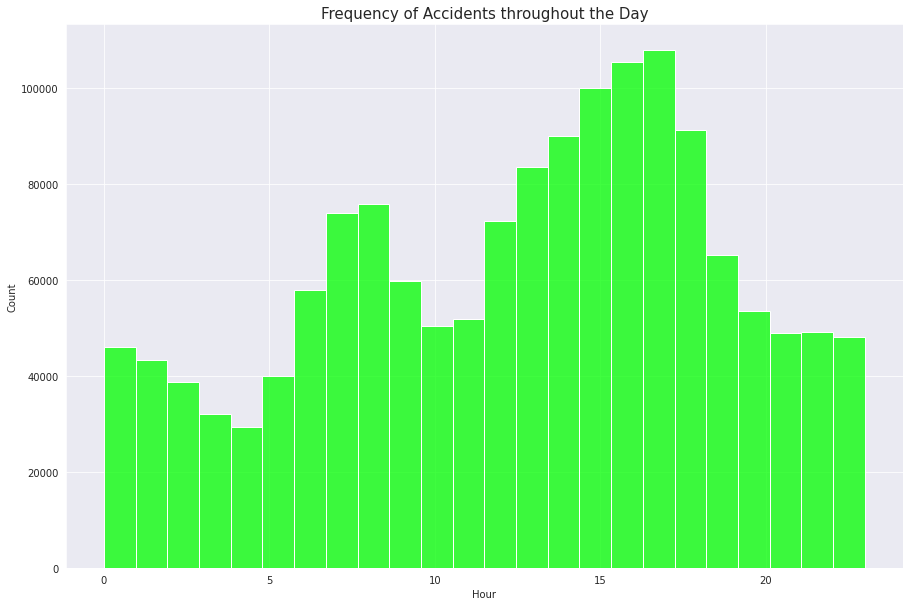

In [46]:
plt.figure(figsize = (15,10))
sns.histplot(data = df, x = "Hour", bins = 24, color='lime')
plt.title("Frequency of Accidents throughout the Day", fontsize = 15)

> #### __Inferences :__ Most accidents happen between 6AM-9AM and between 3PM-6PM. People commute to work and from work in those time gaps respectively. This might be the reason that Saturday and Sunday has least number of Accidents.

### e) Severity

Text(0.5, 1.0, 'Percentage of Severity of Accidents')

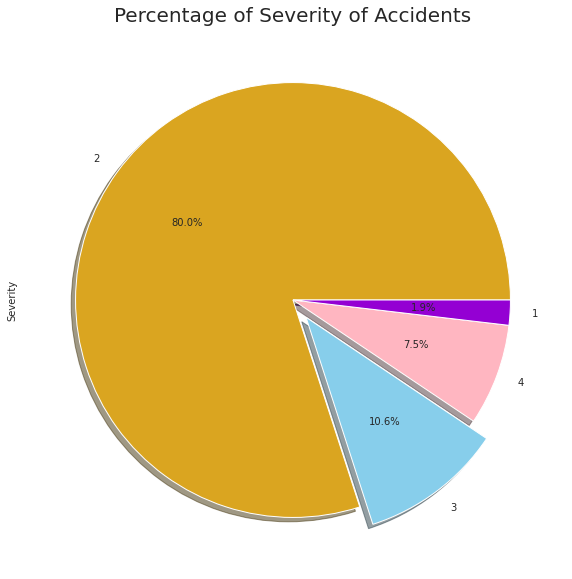

In [47]:
plt.figure(figsize = (25,10))
explode = (0, 0.1, 0, 0)
df["Severity"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", colors = ('goldenrod','skyblue', 'lightpink', 'darkviolet' ), explode = explode, shadow = True)
plt.title("Percentage of Severity of Accidents", fontsize = 20)

 > #### __Inferences :__ **80%** reported accidents have Severity 2 which could mean that there are a lot of accidents which caused some injuries and had little impact.

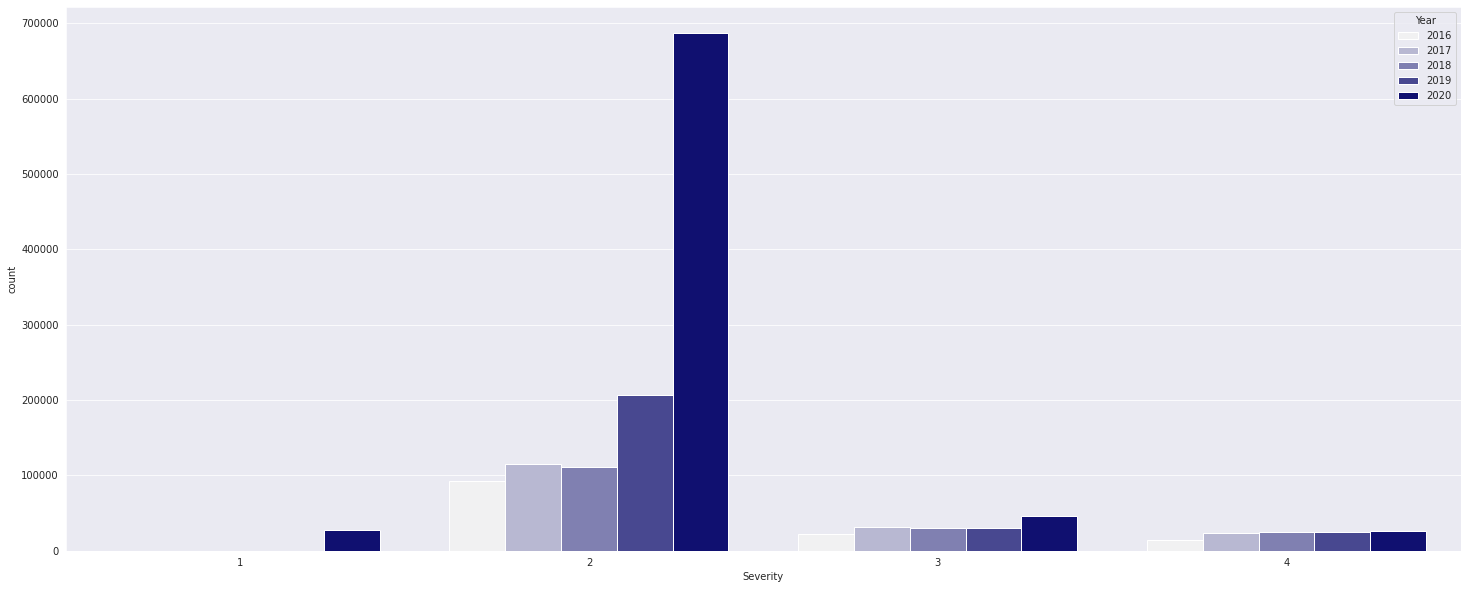

In [48]:
plt.figure(figsize = (25,10))
sns.countplot(x = "Severity", hue = "Year", data = df, color='navy')

> #### __Inferences :__ It seems there are little to no records of Severity 1. Year 2020 had the most number of Severity 2 Accidents though it doesn't seem to be the case in Severity 3 and 4 which is an interesting find.

### f) Weather Condition

In [49]:
weather = df["Weather_Condition"].value_counts().reset_index()
weather.columns = ["Weather", "Number_of_Accidents"]
weather["% of_Accidents"] =(weather["Number_of_Accidents"]*100)/len(df)
weather.sort_values(by = "Number_of_Accidents",ascending = False, inplace = True)
weather_condition = weather.head(30)
weather_condition.head()

,Weather,Number_of_Accidents,% of_Accidents
0,Fair,509259,33.590864
1,Mostly Cloudy,193595,12.769580
2,Clear,180223,11.887559
3,Cloudy,161291,10.638799
4,Partly Cloudy,133102,8.779445


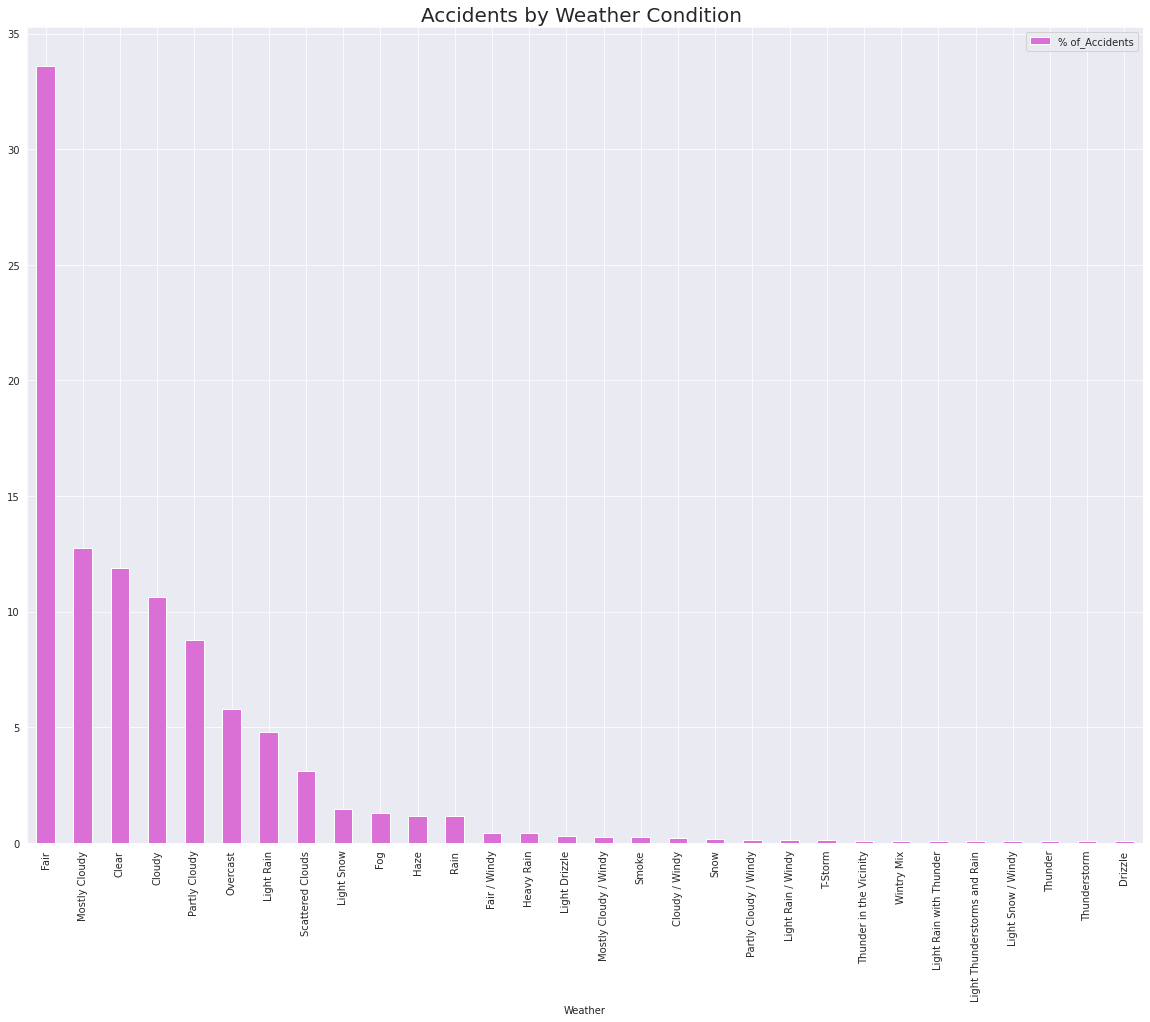

In [50]:
plt.rcParams["figure.figsize"] = (20,15)
weather_condition.plot(x = "Weather", y = "% of_Accidents", kind = "bar", color='orchid')
plt.title("Accidents by Weather Condition ", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [51]:
weather_condition["% of_Accidents"].head(6).sum()

83.46105441458936

> #### __Inferences :__ "Fair" weather condition has the large number of accidents i.e 33% of the accidents. Clear and Mostly Cloudy also have 13% and 12% respectively. Also for Partly Cloudy has 9%, Cloudy has 8%, Overcast has 6% accidents. These top 6 Weather conditions amounts to **83.46%** of total accidents.

> #### Let's plot a pie chart for the above six Weather Conditions with Severity.

In [52]:
group = df.groupby(["Weather_Condition", "Severity"])["Severity"].count().sort_values(ascending = False).unstack("Weather_Condition")

In [53]:
weather_severity = group[["Fair","Clear", "Mostly Cloudy", "Partly Cloudy", "Cloudy", "Overcast"]].unstack()

Text(0, 0.5, '')

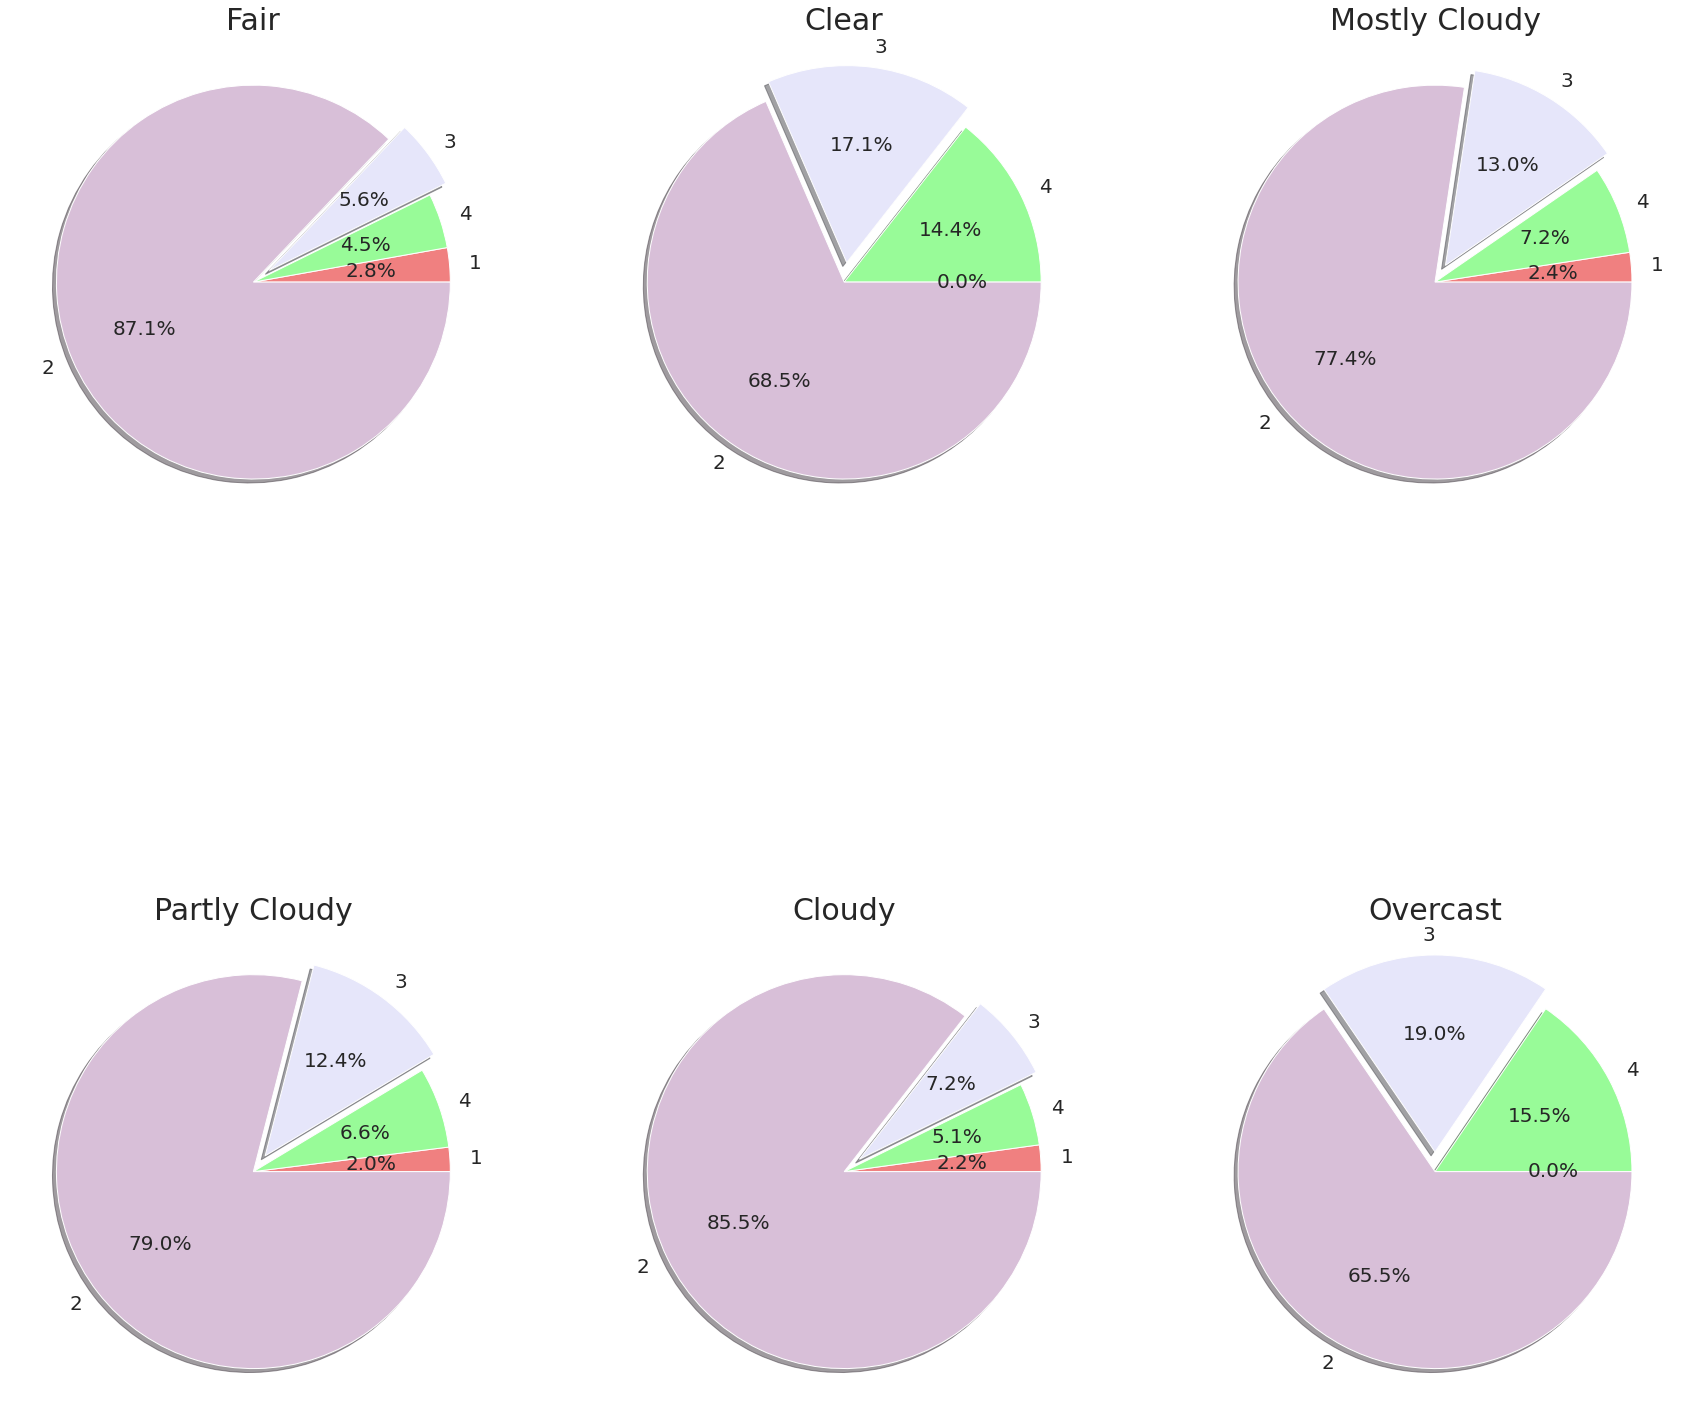

In [54]:
plt.figure(figsize = (30,30))
colors = ('lightcoral', "palegreen", "lavender", 'thistle')
explode = (0, 0, 0.1, 0)
plt.subplot(2,3,1)
weather_severity.loc["Fair"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors =colors, explode = explode, shadow = True)
plt.title("Fair", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,2)
weather_severity.loc["Clear"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Clear", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,3)
weather_severity.loc["Mostly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Mostly Cloudy", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,4)
weather_severity.loc["Partly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Partly Cloudy", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,5)
weather_severity.loc["Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Cloudy", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,6)
weather_severity.loc["Overcast"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Overcast", fontsize = 30)
plt.ylabel("")

> #### __Inferences :__ It seems all six Weather Conditions has most accidents happened in Severity 2 i.e **above 65%**. Clear and Overcast Weather had no Severity 1 accidents.

In [55]:
group1 = df.groupby(["Weather_Condition", "Year"])["Year"].count().sort_values(ascending = False).unstack("Weather_Condition")

In [56]:
weather_year = group1[["Fair","Clear", "Mostly Cloudy", "Partly Cloudy", "Cloudy", "Overcast"]].unstack()

Text(0, 0.5, '')

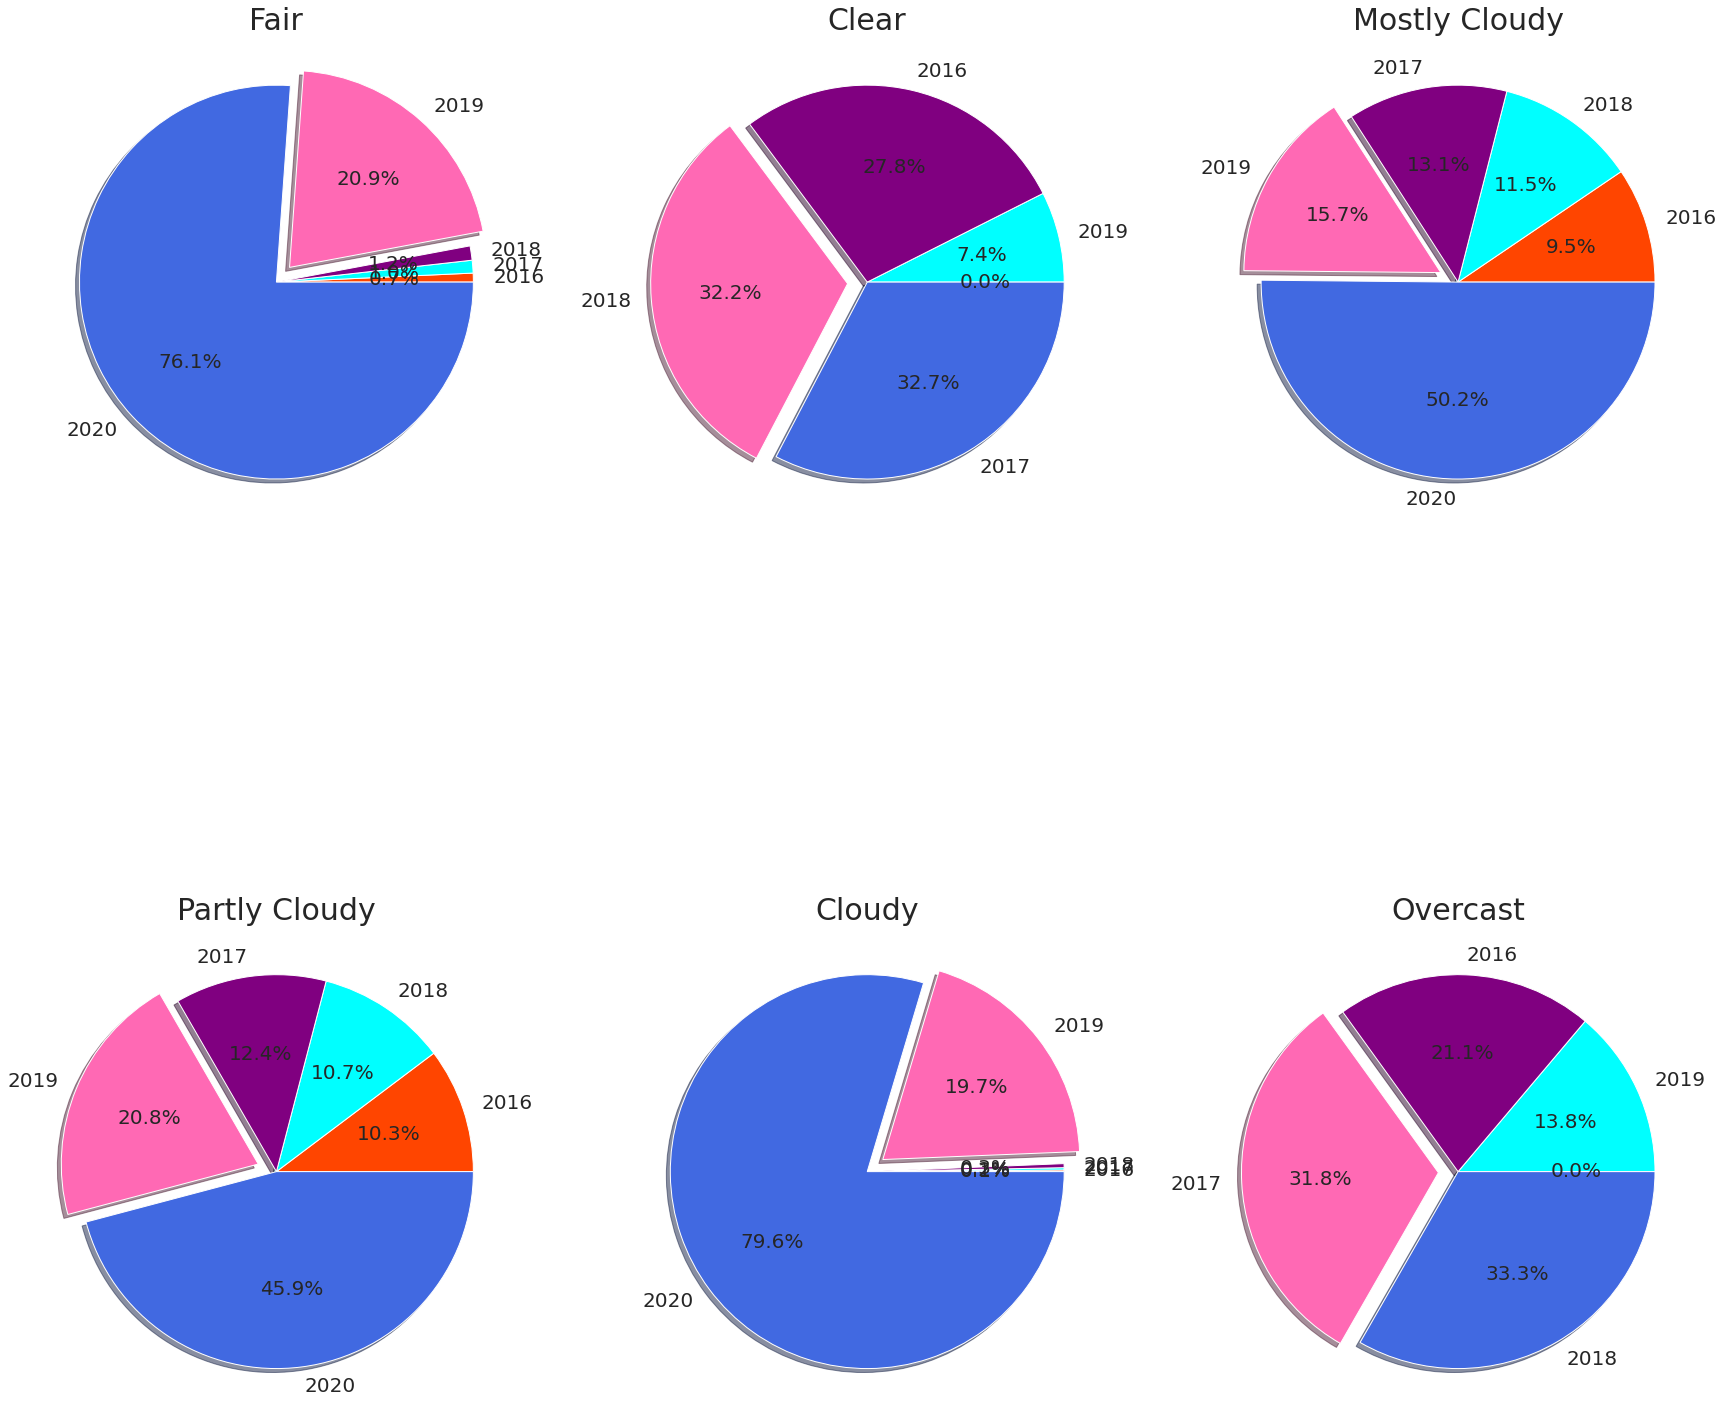

In [57]:
plt.figure(figsize = (30,30))
explode = (0,0, 0, 0.1, 0)
colors = ['orangered', 'aqua', 'purple', 'hotpink','royalblue']
plt.subplot(2,3,1)
weather_year.loc["Fair"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Fair", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,2)
weather_year.loc["Clear"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Clear", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,3)
weather_year.loc["Mostly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Mostly Cloudy", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,4)
weather_year.loc["Partly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Partly Cloudy", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,5)
weather_year.loc["Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Cloudy", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,6)
weather_year.loc["Overcast"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("Overcast", fontsize = 30)
plt.ylabel("")

> #### __Inferences :__ Overcast and Clear weather has no accident records for 2020. This could be an error while collecting data since 2020 recorded most accidents overall. Fair and Cloudy weather conditions had more than 65% accidents happen in 2020.

### g) Temperature(F)

In [58]:
df["Temp Range"] = pd.cut(df["Temperature(F)"], [-100, -50, 0, 50,100, 150, 200, 250], labels = ["-100 - -50", "-50 - 0", "0 - 50", "50 - 100", "100 - 150", "150 - 200", "200 - 250"])

Text(0.5, 1.0, 'Percentage of Accidents in Temp Range')

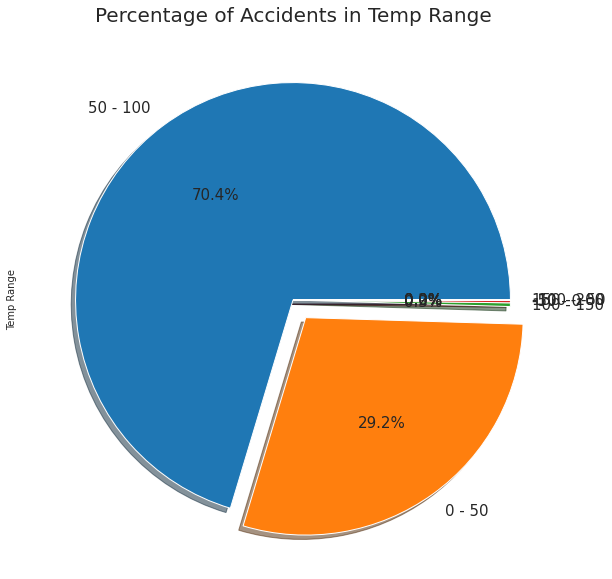

In [59]:
plt.figure(figsize = (25,10))
explode = (0, 0.1, 0, 0, 0, 0, 0)
df["Temp Range"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", textprops={'fontsize': 15}, explode = explode, shadow = True)
plt.title("Percentage of Accidents in Temp Range", fontsize = 20)

> #### __Inferences :__ 70.4% of accidents have happened in Temperature Range of 50-100 F and 29.2% of accidents have happened in 0 - 50 F Temp Range.

In [60]:
group2 = df.groupby(["Temp Range", "Visibility(mi)"])["Temp Range"].count().unstack().stack().sort_values(ascending = False).head(30)

Text(0.5, 1.0, 'Accidents by Temp Range and Visibility ')

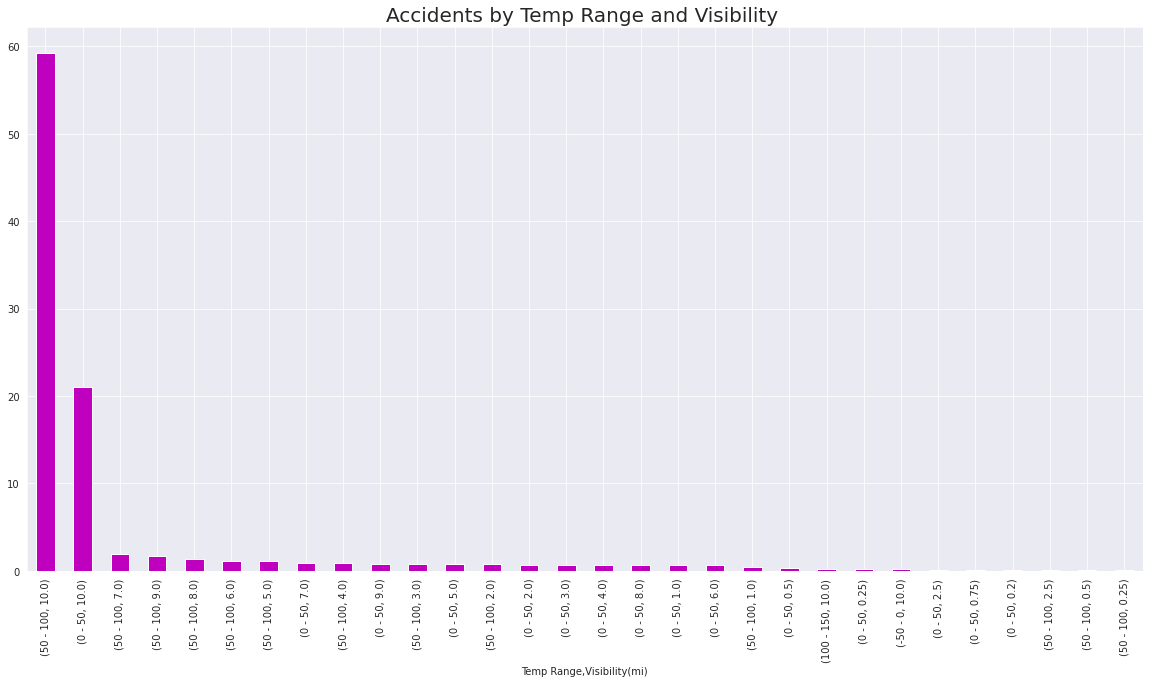

In [61]:
plt.figure(figsize = (20,10))
(group2*100/len(df)).plot(kind = "bar", color = "m")
plt.title("Accidents by Temp Range and Visibility ", fontsize = 20)

> #### __Inferences :__ 60% of the accidents have happened in 50-100F Temp Range with 10.0 mi Visibility and 21% of the accidents have happened in 0-50F with 10.0 mi Visibility

### f) Visibility(mi)

Text(0.5, 1.0, 'Accidents by Visibility ')

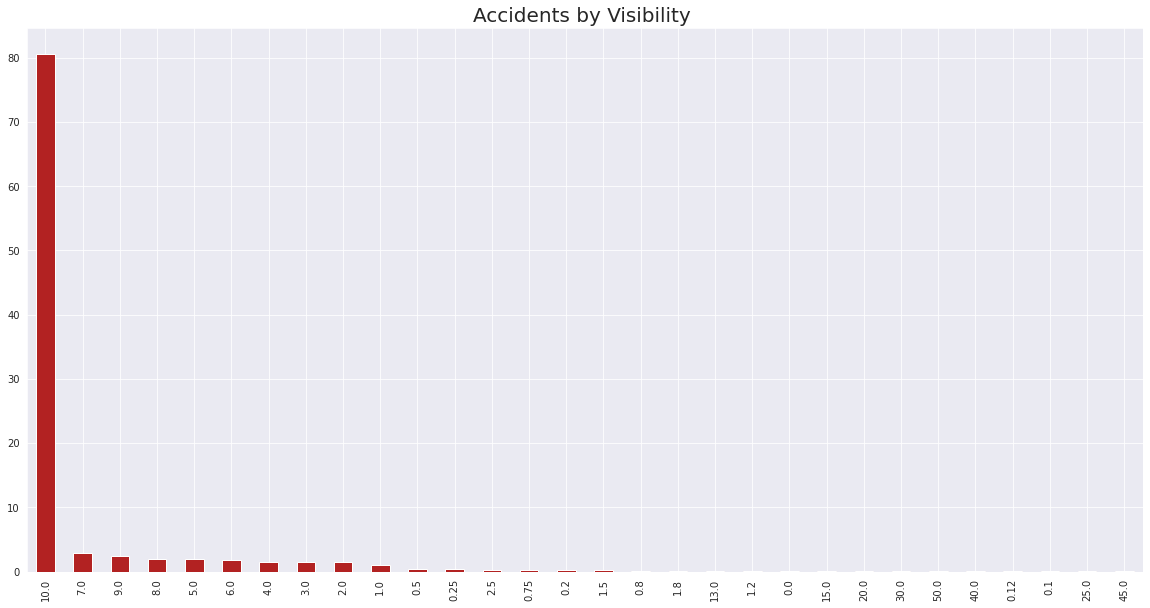

In [62]:
plt.figure(figsize = (20,10))
(df["Visibility(mi)"].value_counts().head(30)*100/len(df)).plot(kind = "bar",color='firebrick')
plt.title("Accidents by Visibility ", fontsize = 20)

> #### __Inferences :__ 80% of the accident records have 10.0 mi Visibility

### h) Distance(mi)

In [63]:
df["Dist Range"] = pd.cut(df["Distance(mi)"], [-1,0,1,2,3,4,350], labels = [ "-1-0","0-1","1-2", "2-3", "3-4", "4+"])

Text(0.5, 1.0, 'Percentage of Accidents in Dist Range')

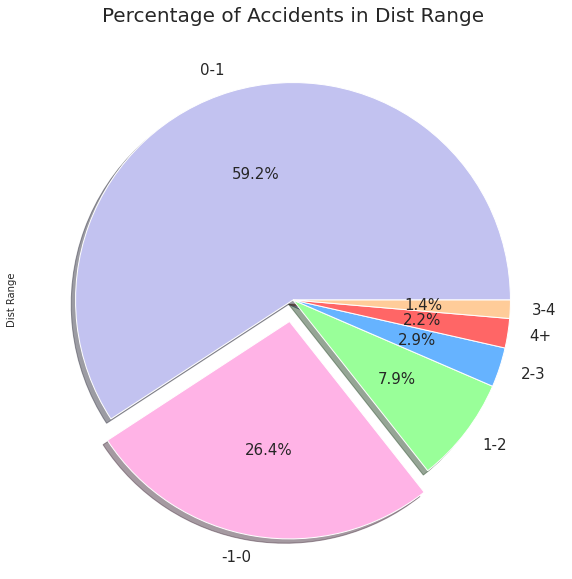

In [64]:
plt.figure(figsize = (25,10))
explode = (0, 0.1, 0, 0, 0, 0)
df["Dist Range"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", textprops={'fontsize': 15}, colors = ['#c2c2f0','#ffb3e6', '#99ff99', '#66b3ff','#ff6666', '#ffcc99'], explode = explode, shadow = True)
plt.title("Percentage of Accidents in Dist Range", fontsize = 20)

> #### __Inferences :__ **26.4%** of the accidents happened on the spot. **59.2%** of accidents have happened in 0 -1 mi Dist Range.

In [65]:
group3 = df.groupby(["Dist Range", "Severity"])["Dist Range"].count().unstack().stack().sort_values(ascending = False).head(30)

Text(0.5, 1.0, 'Accidents by Dist Range and Severity ')

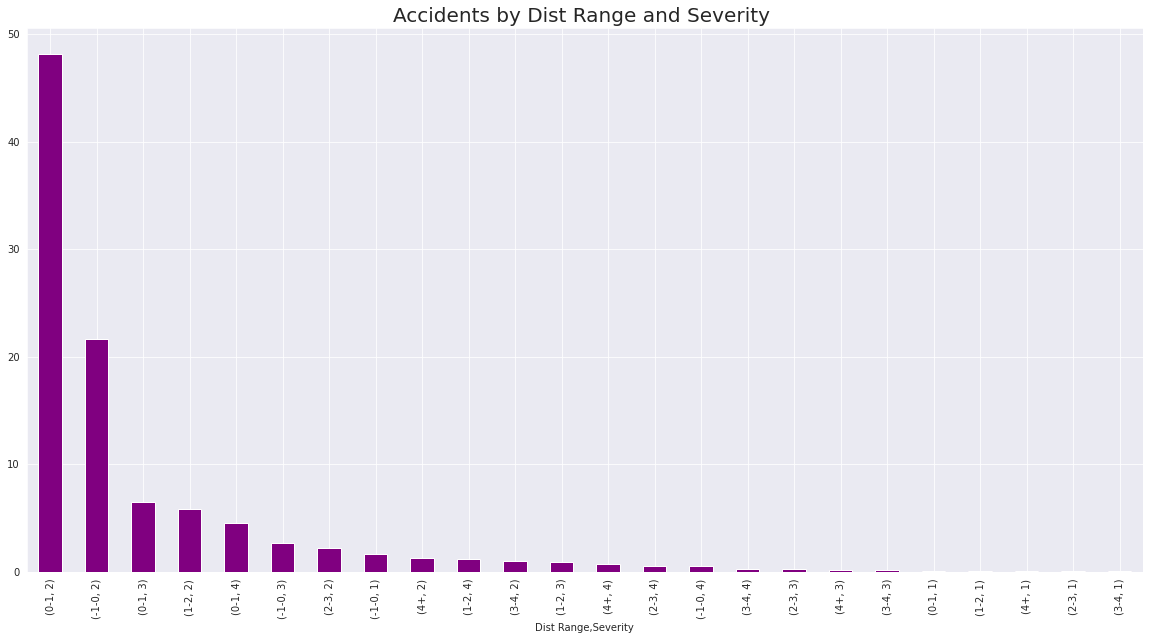

In [66]:
plt.figure(figsize = (20,10))
(group3*100/len(df)).plot(kind = "bar", color = "purple")
plt.title("Accidents by Dist Range and Severity ", fontsize = 20)

> #### __Inferences :__ **21%** of the accidents have happened on the spot with severity 2 accidents. **49%** accidents have happened with 0 - 1 (mi) Dist Range with Severity 2 accidents.

Text(0, 0.5, '')

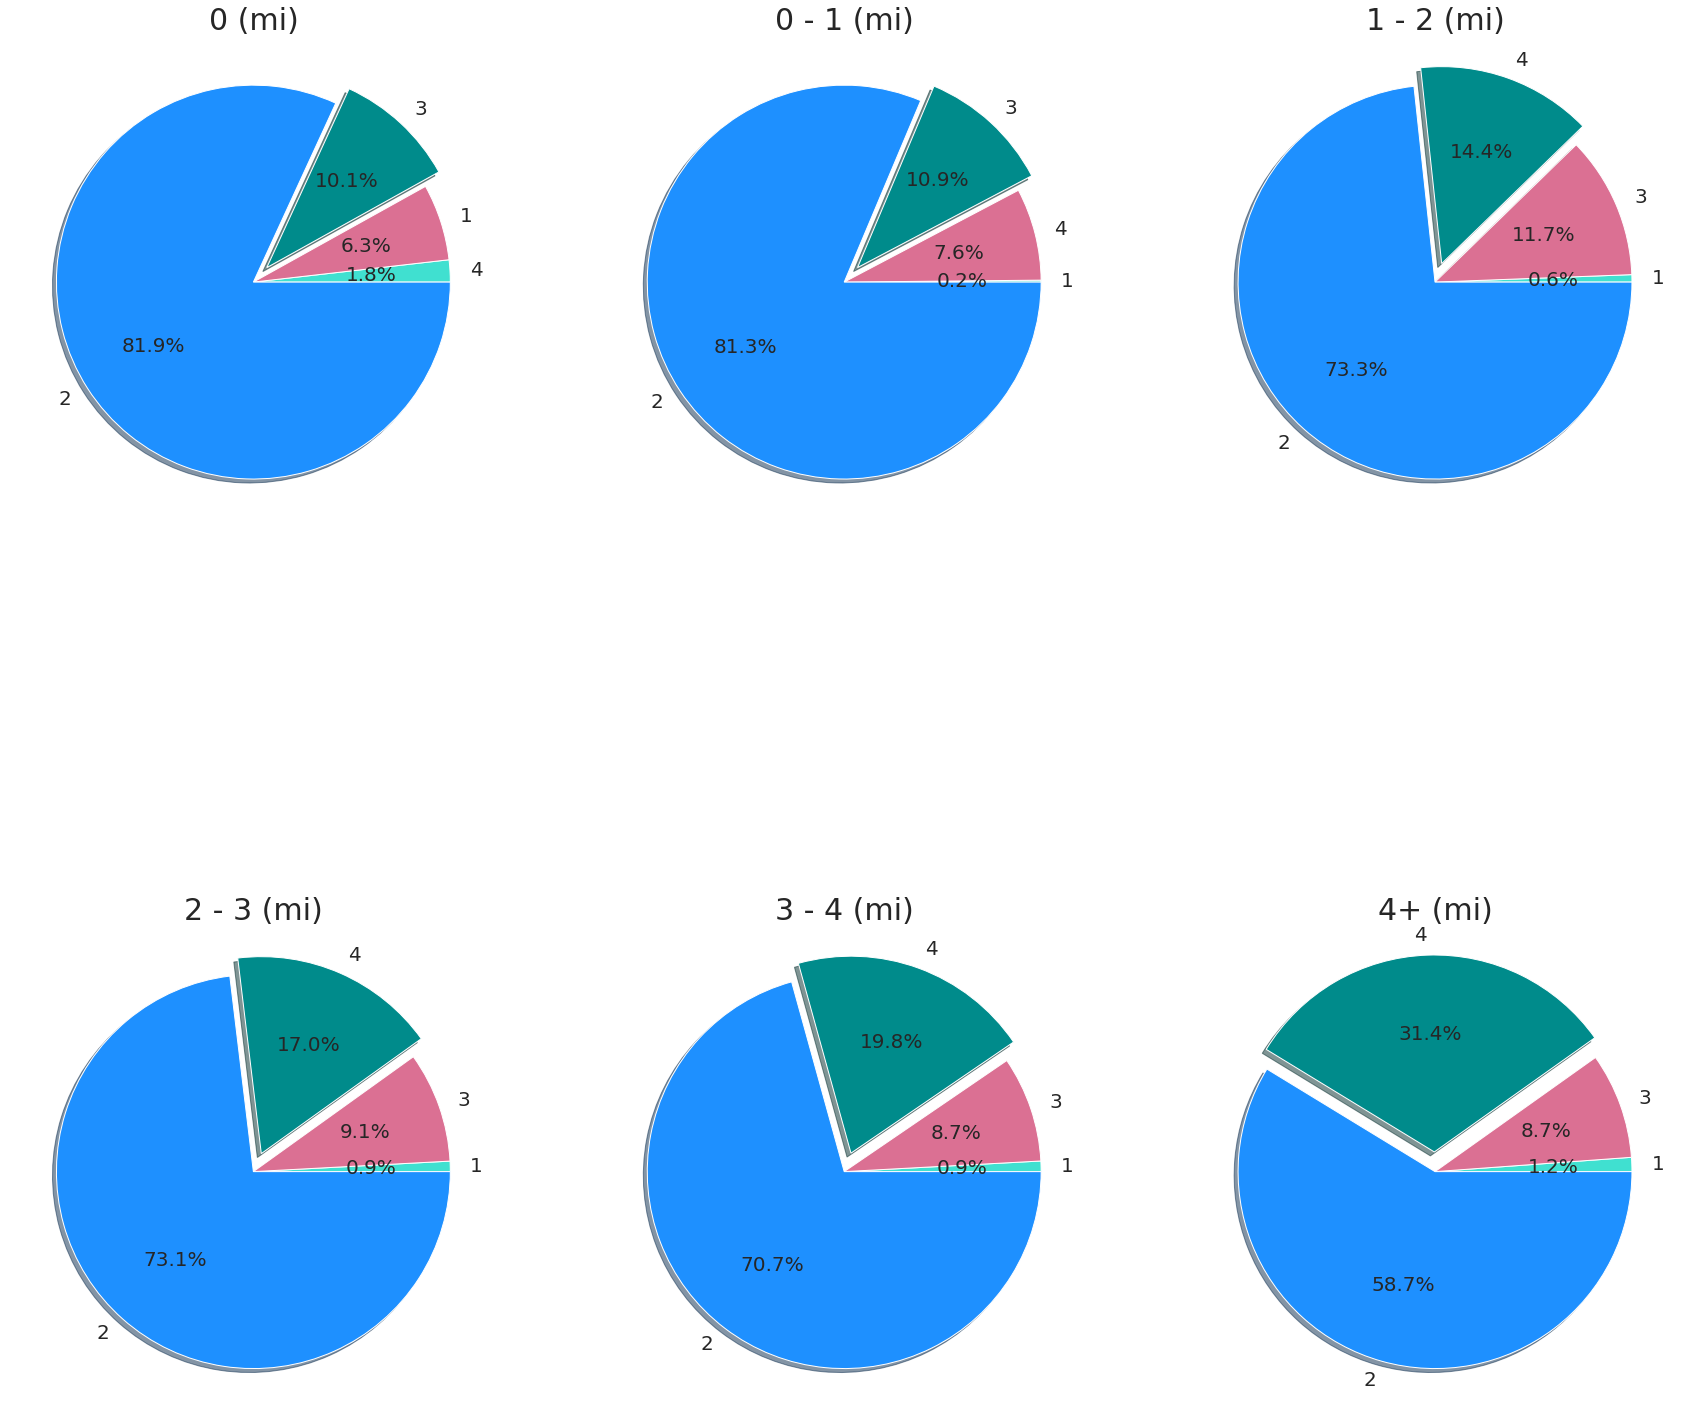

In [67]:
plt.figure(figsize = (30,30))
explode = (0, 0, 0.1, 0)
colors = ['turquoise','palevioletred','darkcyan','dodgerblue']
plt.subplot(2,3,1)
group3.loc["-1-0"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("0 (mi)", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,2)
group3.loc["0-1"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("0 - 1 (mi)", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,3)
group3.loc["1-2"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("1 - 2 (mi)", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,4)
group3.loc["2-3"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("2 - 3 (mi)", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,5)
group3.loc["3-4"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("3 - 4 (mi)", fontsize = 30)
plt.ylabel("")
plt.subplot(2,3,6)
group3.loc["4+"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode, shadow = True)
plt.title("4+ (mi)", fontsize = 30)
plt.ylabel("")

> #### __Inferences :__ As the Distance increases the percentage of Severity 3 & 4 in that Dist Range also increases. Though all Dist Ranges has mostly Severity 2 Accidents among them.

### i) Other Columns

In [68]:
new_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

In [69]:
new_df = pd.DataFrame(columns = ["Columns", "% of Accidents"])

In [70]:
new_df["Columns"] = new_columns

In [71]:
for i in range(len(new_df)):
    new_df["% of Accidents"].loc[i] = len(df[df[new_df["Columns"].loc[i]] == True])*100/len(df)

In [72]:
new_df.sort_values("% of Accidents", ascending = False, inplace = True)
new_df

,Columns,% of Accidents
4,Junction,13.4887
11,Traffic_Signal,11.2112
2,Crossing,5.69785
8,Station,1.85658
9,Stop,1.16723
6,Railway,0.830044
0,Amenity,0.818105
3,Give_Way,0.214701
5,No_Exit,0.114045
10,Traffic_Calming,0.0322546


Text(0.5, 1.0, 'Accidents in presence of different factors')

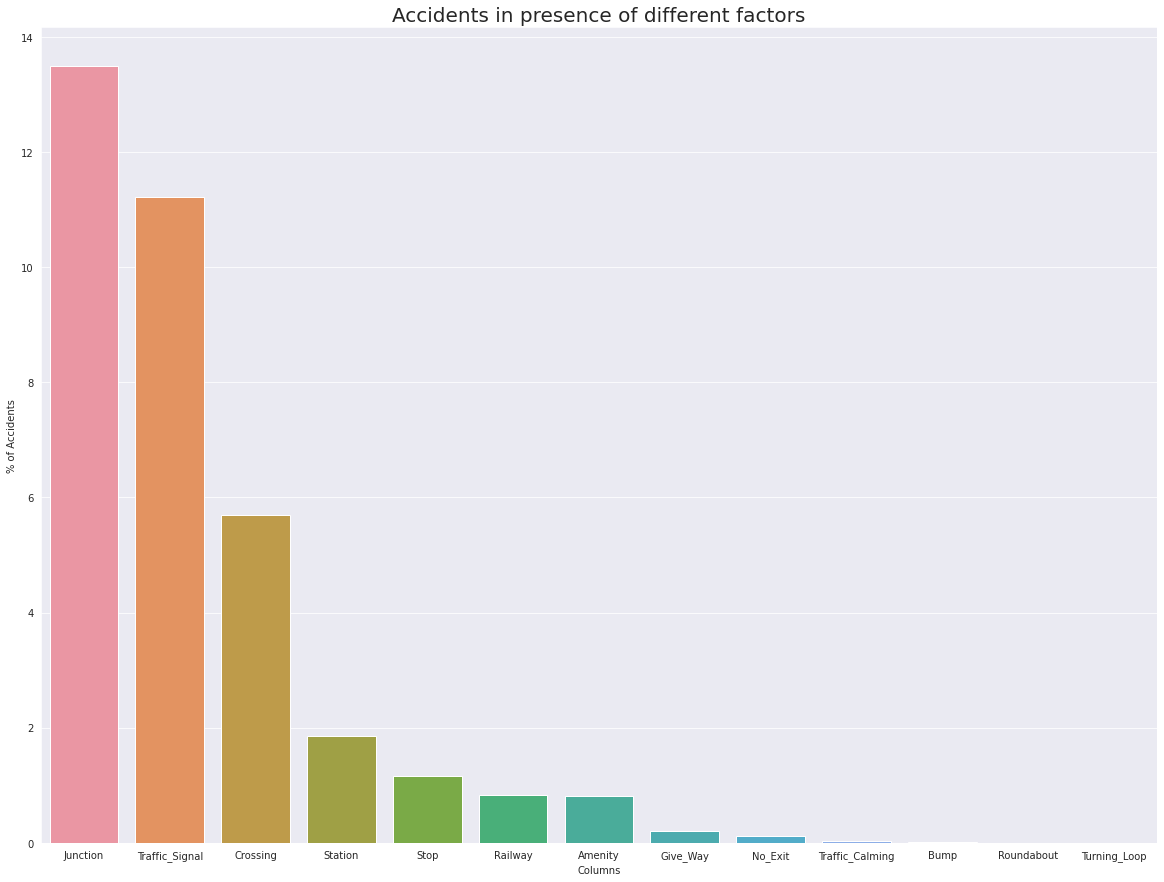

In [73]:
sns.barplot(x = "Columns", y = "% of Accidents", data = new_df)
plt.title("Accidents in presence of different factors", fontsize = 20)

> #### __Inferences :__ For **11%** of Accidents Traffic Signal is nearby. **13.5%** for Junction and **5.8%** for Crossing.

#### Let's create a barplot for the State of California since it has the highest number of accidents with the same columns.

In [74]:
ca_df = pd.DataFrame(columns = ["Columns", "% of Accidents"])

In [75]:
ca_df["Columns"] = new_columns

In [76]:
for i in range(len(ca_df)):
    mask1 = df[ca_df["Columns"].loc[i]] == True
    mask2 = df["State"]  == "CA"
    ca_df["% of Accidents"].loc[i] = len(df[mask1 & mask2])*100/len(df[df["State"] == "CA"])

In [77]:
ca_df.sort_values("% of Accidents", ascending = False, inplace = True)
ca_df

,Columns,% of Accidents
4,Junction,16.1211
11,Traffic_Signal,6.97253
2,Crossing,3.08288
9,Stop,1.8049
8,Station,1.58901
6,Railway,0.976087
0,Amenity,0.550316
3,Give_Way,0.0737468
5,No_Exit,0.0581508
10,Traffic_Calming,0.03342


Text(0.5, 1.0, 'Accidents in California presence of different factors')

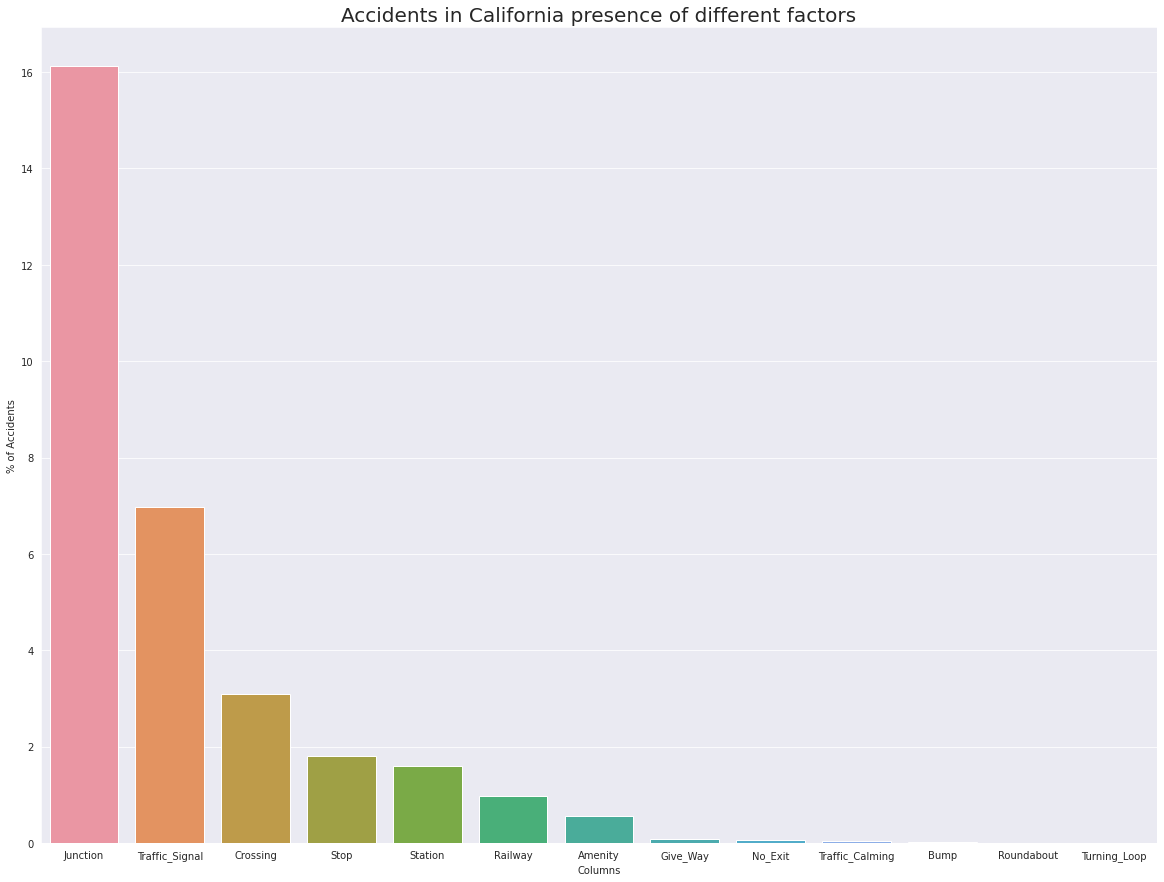

In [78]:
sns.barplot(x = "Columns", y = "% of Accidents", data = ca_df)
plt.title("Accidents in California presence of different factors", fontsize = 20)

> #### __Inferences :__ Junction could be one of the cause of Accidents in California which amounts for **16%** of the total accidents in the State. And Traffic Signal with 7%.

Text(0.5, 1.0, 'Accidents in Day/Night')

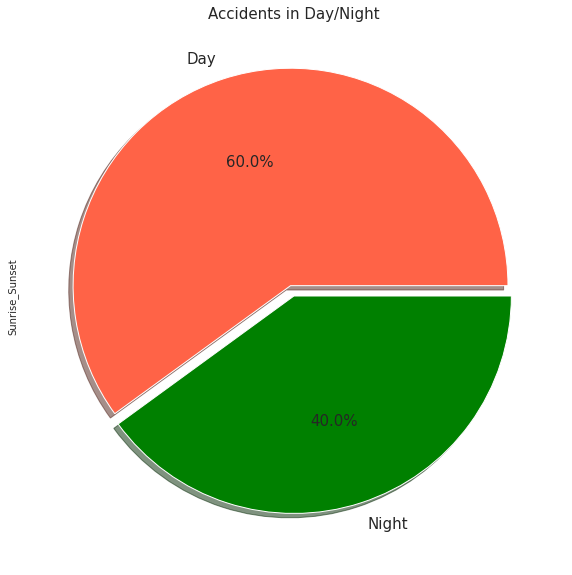

In [79]:
plt.figure(figsize = (25,10))
df["Sunrise_Sunset"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", textprops={'fontsize': 15}, explode = (0.05,0), colors = ['tomato','green'], shadow = True)
plt.title("Accidents in Day/Night", fontsize = 15)

> #### __Inferences :__ **60%** of accidents happen during the day. And 40% happen in night.

#Univariate, Bivariate, Multivariate Analysis

##**1) Univariate Analysis**

If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.


> **a) Categorical Unordered Univariate Analysis:**

An unordered variable is a categorical variable that has no defined order.


In [80]:
weather = df["Weather_Condition"].value_counts().reset_index()
weather.columns = ["Weather", "Number_of_Accidents"]
weather["% of_Accidents"] =(weather["Number_of_Accidents"]*100)/len(df)
weather.sort_values(by = "Number_of_Accidents",ascending = False, inplace = True)
weather_condition = weather.head(30)
weather_condition.head()

,Weather,Number_of_Accidents,% of_Accidents
0,Fair,509259,33.590864
1,Mostly Cloudy,193595,12.769580
2,Clear,180223,11.887559
3,Cloudy,161291,10.638799
4,Partly Cloudy,133102,8.779445


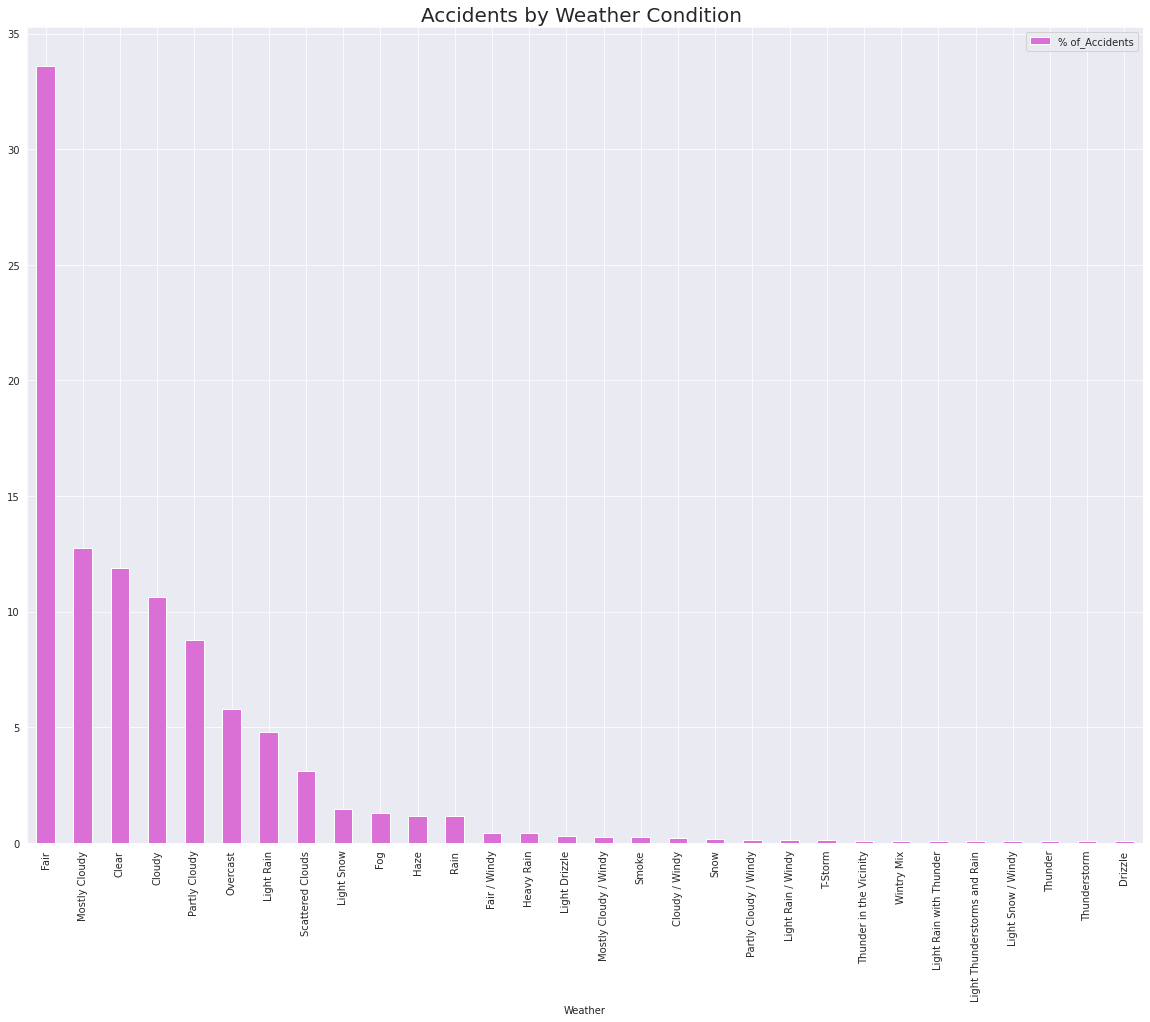

In [81]:
plt.rcParams["figure.figsize"] = (20,15)
weather_condition.plot(x = "Weather", y = "% of_Accidents", kind = "bar", color='orchid')
plt.title("Accidents by Weather Condition ", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Inference : By the above bar plot, we can infer that the data set contains more number of Accidents in Fair whather compared to other categories.



>**b) Categorical Ordered Univariate Analysis:**

Ordered variables are those variables that have a natural rank of order.



Text(0.5, 1.0, 'Percentage of yearly Accidents')

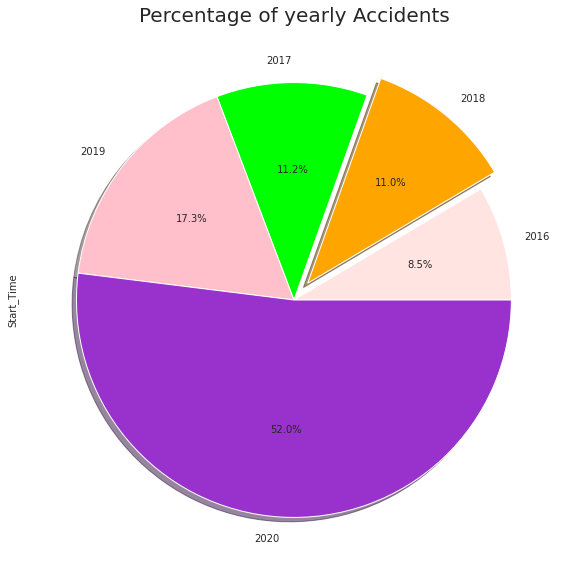

In [82]:
plt.figure(figsize = (25,10))
explode = (0, 0.1, 0, 0, 0)
colors = ['mistyrose','orange', 'lime', 'pink', 'darkorchid']
(df["Start_Time"].dt.year.value_counts(ascending = True)*100/len(df)).plot(kind = "pie", autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True)
plt.title("Percentage of yearly Accidents", fontsize = 20)

**Inference :** By the above analysis, we can infer that the data set has a large number of them belongs to year 2020 after that 2019 and next 2017. Also, a very small percentage of them have been 2016.
This is how we analyze univariate categorical analysis. 

**#2) Bivariate Analysis**

If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.



> **a) Numeric-Numeric Analysis:**


Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.

1. Scatter Plot
2. Pair Plot
3. Correlation Matrix

**1) Scatter Plot**

In [83]:
group2 = df.groupby(["Temp Range", "Visibility(mi)"])["Temp Range"].count().unstack().stack().sort_values(ascending = False).head(30)

Text(0.5, 1.0, 'Accidents by Temp range and Visibility')

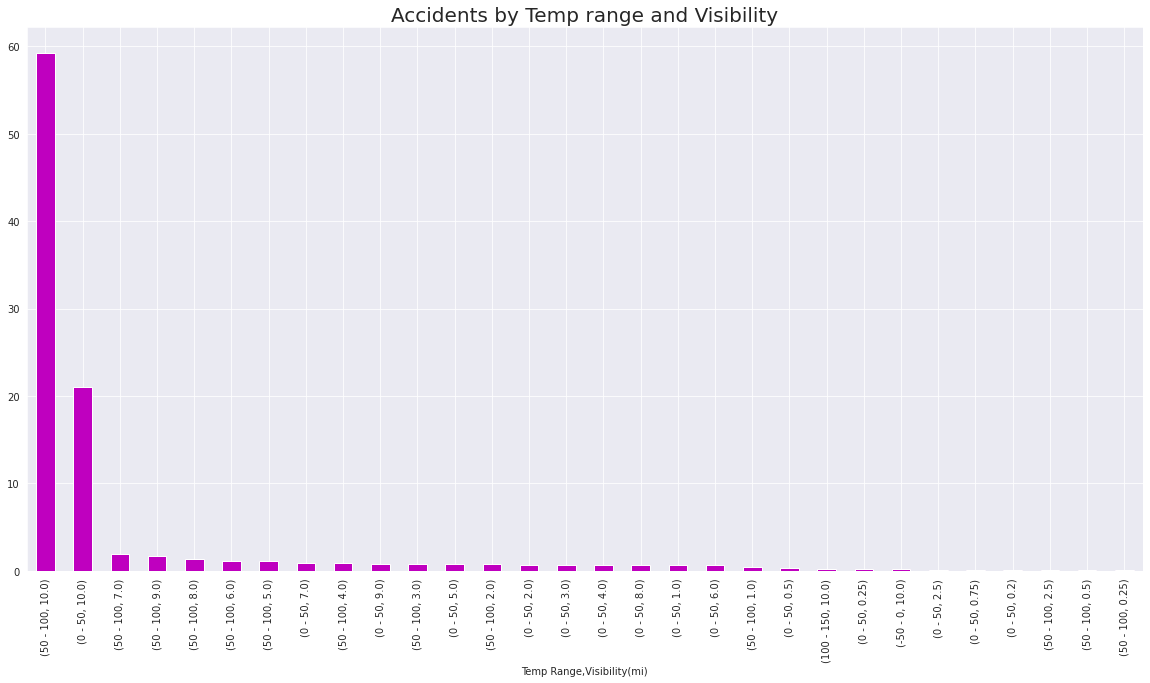

In [84]:
plt.figure(figsize = (20,10))
(group2*100/len(df)).plot(kind = "bar", color = "m")
plt.title("Accidents by Temp range and Visibility", fontsize = 20)

In [85]:
group3 = df.groupby(["Temp Range", "Humidity(%)"])["Temp Range"].count().unstack().stack().sort_values(ascending = False).head(30)

Text(0.5, 1.0, 'Accidents by Temp Range and Humidity')

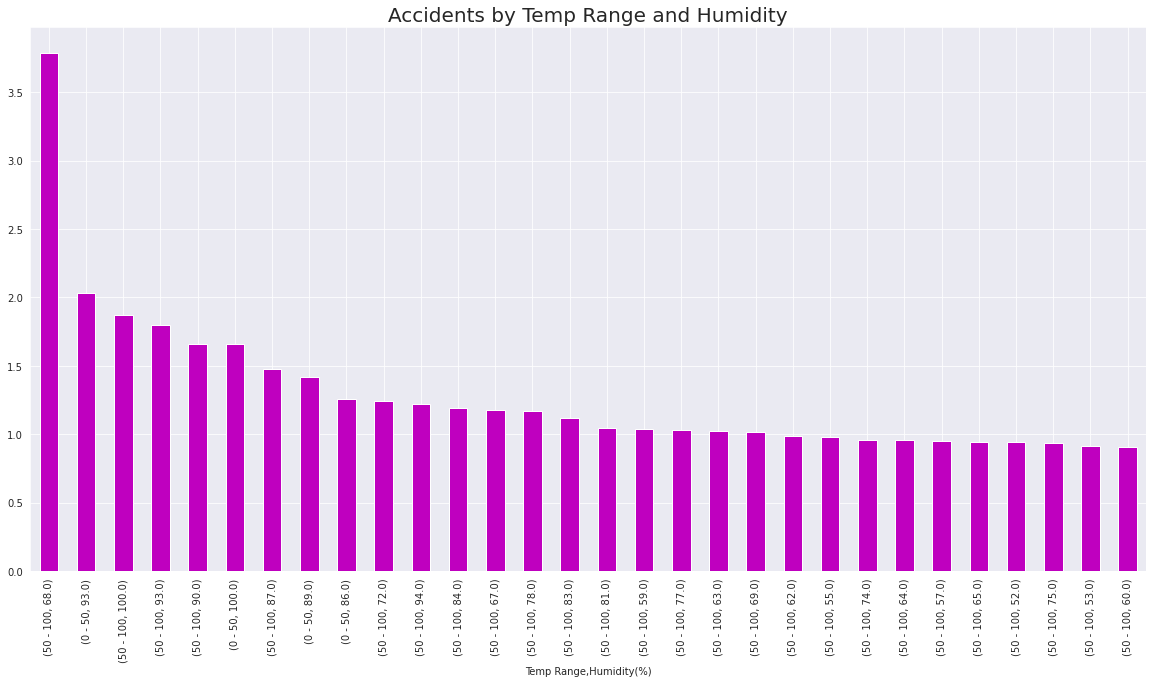

In [86]:
plt.figure(figsize = (20,10))
(group3*100/len(df)).plot(kind = "bar", color = "m")
plt.title("Accidents by Temp Range and Humidity", fontsize = 20)

**2) Pair Plot:**

Now, let’s plot Pair Plots for the three columns we used in plotting Scatter plots. We’ll use the seaborn library for plotting Pair Plots.


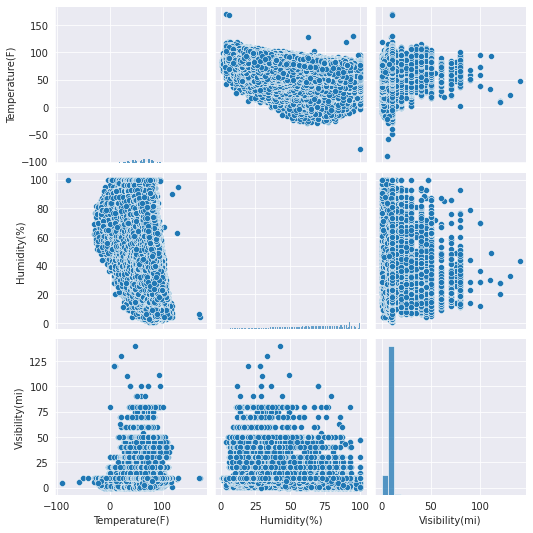

In [87]:
sns.pairplot(data = data, vars=["Temperature(F)", "Humidity(%)","Visibility(mi)"])
plt.show()

**Correlation Matrix**

Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.

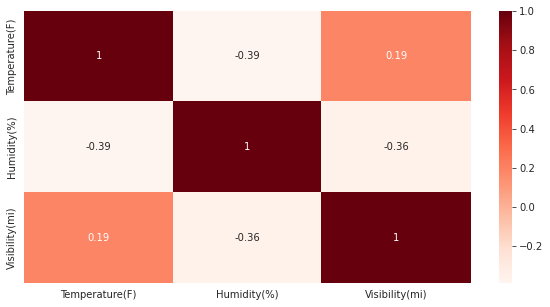

In [88]:
plt.figure(figsize = (10,5))
data[["Temperature(F)", "Humidity(%)","Visibility(mi)"]].corr()

#plot the correlation matrix of Temperature, Humidity and Visibility in data dataframe.
sns.heatmap(data[["Temperature(F)", "Humidity(%)","Visibility(mi)"]].corr(), annot=True, cmap = 'Reds')
plt.show()

# USA Car Accidents Severity Prediction Modeling

<a id="1.2"></a>
#  Required libraries

In [91]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 301 kB/s 


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import category_encoders as ce

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


import plotly.graph_objects as go
from nltk.corpus import stopwords

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id="3"></a>
#  Data Preprocessing


In [93]:
data = pd.read_csv("/content/drive/MyDrive/CIS 690 Project/US_Accidents_Dec20_updated.csv")
df = data.copy()
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [94]:
X = df
X.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


<a id="3.1"></a>
##  1.1. Feature addition

Decompose the Start_Time feature in year, month, day, weekday, hour and minute, in order to feed them to the models.

In [95]:
# Cast Start_Time to datetime
X["Start_Time"] = pd.to_datetime(X["Start_Time"])

# Extract year, month, weekday and day
X["Year"] = X["Start_Time"].dt.year
X["Month"] = X["Start_Time"].dt.month
X["Weekday"] = X["Start_Time"].dt.weekday
X["Day"] = X["Start_Time"].dt.day

# Extract hour and minute
X["Hour"] = X["Start_Time"].dt.hour
X["Minute"] = X["Start_Time"].dt.minute

X.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,0,8,0,37
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,0,8,5,56
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,0,8,6,15
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,0,8,6,15
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,2,0,8,6,51


<a id="3.2"></a>
## 1.2 Check correlation between features
correlation matrix between all the possible features, in the form of an heatmap. 



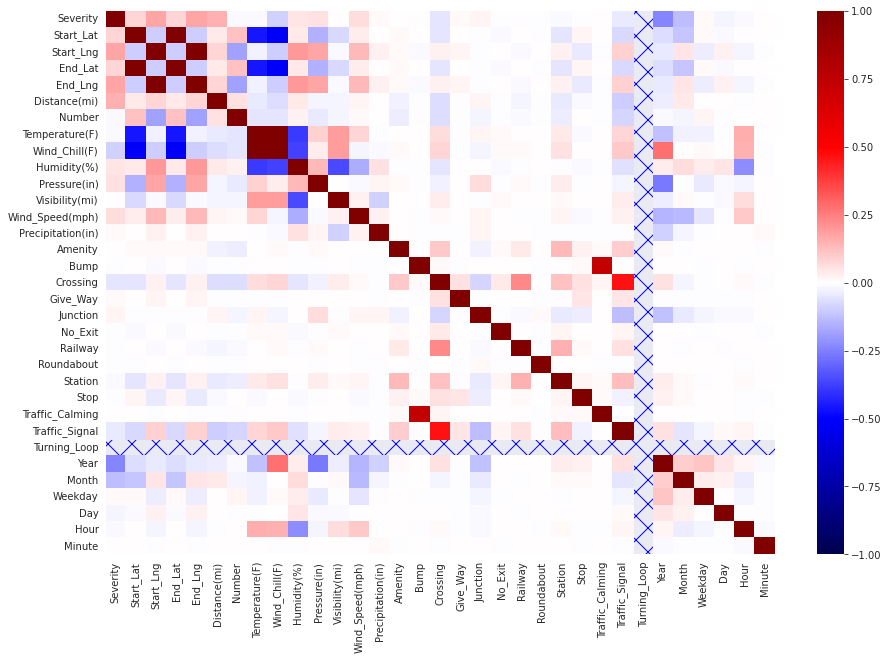

In [96]:
corr_matrix = X.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="blue")
plt.show()

**Inferences :**

1) From the matrix we can see that the start and end coordinates of the accidents are highly correlated. 

2) The wind chill (temperature) is directly proportional to the temperature, so we can also drop one of them.

3) The traffic signal is slightly correlated to the severity of an accident meaning that maybe traffic lights can help the traffic flow when an accident occurs.

4) We can also see that we couldn't compute the covariance with Turning_Loop, and that's because it's always False.

<a id="3.3"></a>
## 1.3 Feature selection

To build the best model we will choose the best features and drop rest of all the features.

Features to build the model are as follows :-

Severity,	Start_Lat,	Start_Lng	Distance(mi),	Side,	City,	Temperature(F),	Humidity(%),	Pressure(in),	Visibility(mi),	Wind_Direction,	Wind_Speed(mph),	Precipitation(in),	Weather_Condition,	Amenity	Bump,	Crossing,	Give_Way,	Junction,	No_Exit

In [97]:
features_to_drop = ["ID", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Description", "Number", "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
X = X.drop(features_to_drop, axis=1)
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,40.10891,-83.09286,3.230,R,Dublin,42.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,2,0,8,0,37
1,2,39.86542,-84.06280,0.747,R,Dayton,36.9,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,2,0,8,5,56
2,2,39.10266,-84.52468,0.055,R,Cincinnati,36.0,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Night,2016,2,0,8,6,15
3,2,39.10148,-84.52341,0.219,R,Cincinnati,36.0,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Night,2016,2,0,8,6,15
4,2,41.06213,-81.53784,0.123,R,Akron,39.0,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,2,0,8,6,51


<a id="3.4"></a>
## 1.4 Drop duplicates

check if there are some duplicates in the dataset.

In [98]:
print("Number of rows:", len(X.index))
X.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(X.index))

Number of rows: 1516064
Number of rows after drop of duplicates: 1347803


<a id="3.5"></a>
## 1.5 Handle missing values



In [99]:
X["Side"].value_counts()

R    1157253
L     190550
Name: Side, dtype: int64

There is one record without side, so we can drop it.

In [100]:
X = X[X["Side"] != " "]
X["Side"].value_counts()

R    1157253
L     190550
Name: Side, dtype: int64

Analyze Pressure and Visibility:

In [101]:
X[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,1316341.00,1309251.00
mean,29.56,9.14
std,1.02,2.93
min,0.00,0.00
25%,29.47,10.00
50%,29.89,10.00
75%,30.05,10.00
max,58.04,140.00


**Inferences :**

We can see that the minimum value is 0, it means some records are missing them and replaced them by putting zeros.
Hence, we are going to drop the records with missing values for these two columns.

In [102]:
X = X[X["Pressure(in)"] != 0]
X = X[X["Visibility(mi)"] != 0]
X[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,1315172.00,1308081.00
mean,29.57,9.15
std,1.01,2.92
min,0.02,0.06
25%,29.47,10.00
50%,29.89,10.00
75%,30.05,10.00
max,58.04,140.00


Reduce the number of unique conditions.

In [103]:
unique_weather = X["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

117
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Volcanic Ash' 'Freezing Rain / Windy' 'Small Hail

Replacing weather conditions with a more generic description:

In [104]:
X.loc[X["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
X.loc[X["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
X.loc[X["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
X.loc[X["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
X.loc[X["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
X.loc[X["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
X.loc[X["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
X.loc[X["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
X.loc[X["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
X.loc[X["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
X.loc[X["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(X["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' nan 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


Checking the Wind_Direction field:

In [105]:
X["Wind_Direction"].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

As we can see, we can group the values like we did with Weather_Condition:

In [106]:
X.loc[X["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
X.loc[X["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
X.loc[X["Wind_Direction"] == "East", "Wind_Direction"] = "E"
X.loc[X["Wind_Direction"] == "North", "Wind_Direction"] = "N"
X.loc[X["Wind_Direction"] == "South", "Wind_Direction"] = "S"
X.loc[X["Wind_Direction"] == "West", "Wind_Direction"] = "W"

X["Wind_Direction"] = X["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

X["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'Variable',
       'NE'], dtype=object)

Next, let's analyze the missing values:

In [107]:
X.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Side                      0
City                     77
Temperature(F)        37272
Humidity(%)           39357
Pressure(in)          31460
Visibility(mi)        38551
Wind_Direction        35703
Wind_Speed(mph)      121556
Precipitation(in)    494369
Weather_Condition     38814
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Civil_Twilight           77
Year                      0
Month                     0
Weekday                   0
Day                       0
Hour                      0
Minute                    0
dtype: int64



For numerical features we are going to fill the missing features with the mean, while for categorical features like City, Wind_Direction, Weather_Condition and Civil_Twilight, we are going to delete the records with missing informations.

In [108]:
features_to_fill = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
X[features_to_fill] = X[features_to_fill].fillna(X[features_to_fill].mean())

X.dropna(inplace=True)

X.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Year                 0
Month                0
Weekday              0
Day                  0
Hour                 0
Minute               0
dtype: int64

<a id="3.7"></a>
## 1.6 Handle unbalanced data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


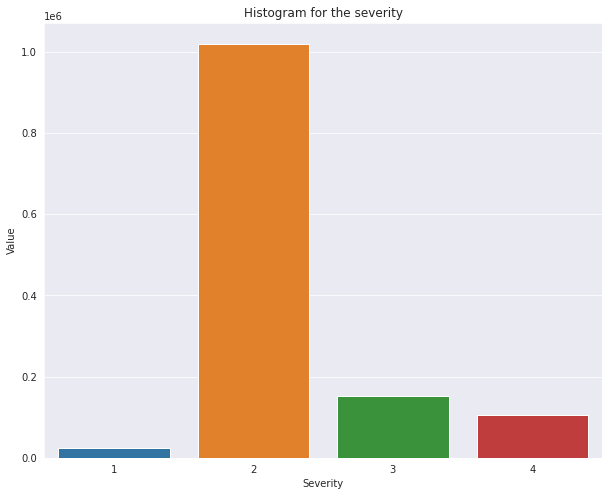

In [109]:
severity_counts = X["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

**Inferences :**

The number of accident with the severity 1 is very small instead the number of accident with severity 2 is much higher.

So, in order to balance the data we are going to undersample all the categories to the number of records of the minority category, in this case the severity 1.

In [110]:
size = len(X[X["Severity"]==1].index)
df = pd.DataFrame()
for i in range(1,5):
    S = X[X["Severity"]==i]
    df = df.append(S.sample(size, random_state=42))
X = df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


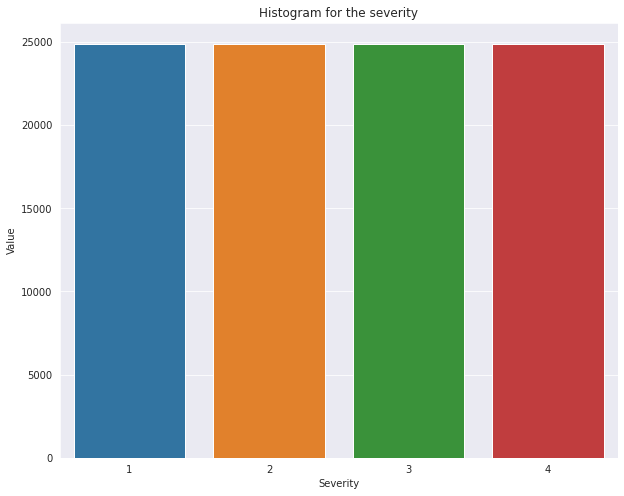

In [111]:
severity_counts = X["Severity"].value_counts()
plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

<a id="3.8"></a>
## 1.7 Feature scaling

To improve the performance of our models, we normalized the values of the continuous features.

In [112]:
scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
X[features] = scaler.fit_transform(X[features])
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
835382,1,0.473339,0.503429,0.0,R,Tulsa,0.877451,0.408163,0.713953,0.110518,S,0.099237,0.000,Clear,False,False,False,False,True,False,False,False,False,False,False,False,Day,1.0,0.454545,0.333333,0.533333,0.782609,0.796610
746721,1,0.530884,0.827661,0.0,L,Richmond,0.696078,0.928571,0.744186,0.110518,NE,0.076336,0.001,Rain,False,False,False,False,False,False,False,False,False,False,False,True,Day,1.0,0.363636,0.666667,0.000000,0.347826,0.152542
940910,1,0.167456,0.758771,0.0,R,Casselberry,0.833333,0.224490,0.775969,0.110518,NE,0.045802,0.000,Clear,False,False,False,False,False,False,False,False,False,False,False,True,Day,1.0,0.272727,0.000000,0.866667,0.739130,0.118644
756890,1,0.674596,0.757100,0.0,R,Akron,0.627451,0.642857,0.677519,0.110518,N,0.114504,0.000,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,1.0,0.363636,0.666667,0.233333,0.652174,0.423729
758374,1,0.316255,0.239962,0.0,L,Tucson,0.897059,0.091837,0.557364,0.110518,N,0.045802,0.000,Clear,False,False,True,False,False,False,False,False,False,False,False,True,Day,1.0,0.363636,0.666667,0.233333,0.565217,0.000000


<a id="3.9"></a>
## 1.8. Feature encoding

Finally, in this section we are going to encode the categorical features.

In [113]:
categorical_features = set(["Side", "City", "Wind_Direction", "Weather_Condition", "Civil_Twilight"])

for cat in categorical_features:
    X[cat] = X[cat].astype("category")

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99616 entries, 835382 to 1264945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Severity           99616 non-null  int64   
 1   Start_Lat          99616 non-null  float64 
 2   Start_Lng          99616 non-null  float64 
 3   Distance(mi)       99616 non-null  float64 
 4   Side               99616 non-null  category
 5   City               99616 non-null  category
 6   Temperature(F)     99616 non-null  float64 
 7   Humidity(%)        99616 non-null  float64 
 8   Pressure(in)       99616 non-null  float64 
 9   Visibility(mi)     99616 non-null  float64 
 10  Wind_Direction     99616 non-null  category
 11  Wind_Speed(mph)    99616 non-null  float64 
 12  Precipitation(in)  99616 non-null  float64 
 13  Weather_Condition  99616 non-null  category
 14  Amenity            99616 non-null  bool    
 15  Bump               99616 non-null  bool    
 1

First of all, we show the number of unique classes for each categorical feature.

In [114]:
print("Unique classes for each categorical feature:")
for cat in categorical_features:
    print("{:15s}".format(cat), "\t", len(X[cat].unique()))

Unique classes for each categorical feature:
Weather_Condition 	 10
Civil_Twilight  	 2
Side            	 2
Wind_Direction  	 10
City            	 6667


Let's first encode the boolean values in a numerical form.

In [115]:
X = X.replace([True, False], [1, 0])

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
835382,1,0.473339,0.503429,0.0,R,Tulsa,0.877451,0.408163,0.713953,0.110518,S,0.099237,0.000,Clear,0,0,0,0,1,0,0,0,0,0,0,0,Day,1.0,0.454545,0.333333,0.533333,0.782609,0.796610
746721,1,0.530884,0.827661,0.0,L,Richmond,0.696078,0.928571,0.744186,0.110518,NE,0.076336,0.001,Rain,0,0,0,0,0,0,0,0,0,0,0,1,Day,1.0,0.363636,0.666667,0.000000,0.347826,0.152542
940910,1,0.167456,0.758771,0.0,R,Casselberry,0.833333,0.224490,0.775969,0.110518,NE,0.045802,0.000,Clear,0,0,0,0,0,0,0,0,0,0,0,1,Day,1.0,0.272727,0.000000,0.866667,0.739130,0.118644
756890,1,0.674596,0.757100,0.0,R,Akron,0.627451,0.642857,0.677519,0.110518,N,0.114504,0.000,Cloudy,0,0,0,0,0,0,0,0,0,0,0,1,Day,1.0,0.363636,0.666667,0.233333,0.652174,0.423729
758374,1,0.316255,0.239962,0.0,L,Tucson,0.897059,0.091837,0.557364,0.110518,N,0.045802,0.000,Clear,0,0,1,0,0,0,0,0,0,0,0,1,Day,1.0,0.363636,0.666667,0.233333,0.565217,0.000000


Now we can encode the categorical features using the method `get_dummies()` which converts the features with the one-hot encoding.

In [116]:
# Remove city because it will be encoded later
onehot_cols = categorical_features - set(["City"])

X = pd.get_dummies(X, columns=onehot_cols, drop_first=True)

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,Side_R,Civil_Twilight_Night
835382,1,0.473339,0.503429,0.0,Tulsa,0.877451,0.408163,0.713953,0.110518,0.099237,0.000,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.454545,0.333333,0.533333,0.782609,0.796610,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
746721,1,0.530884,0.827661,0.0,Richmond,0.696078,0.928571,0.744186,0.110518,0.076336,0.001,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.363636,0.666667,0.000000,0.347826,0.152542,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
940910,1,0.167456,0.758771,0.0,Casselberry,0.833333,0.224490,0.775969,0.110518,0.045802,0.000,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.272727,0.000000,0.866667,0.739130,0.118644,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
756890,1,0.674596,0.757100,0.0,Akron,0.627451,0.642857,0.677519,0.110518,0.114504,0.000,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.363636,0.666667,0.233333,0.652174,0.423729,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
758374,1,0.316255,0.239962,0.0,Tucson,0.897059,0.091837,0.557364,0.110518,0.045802,0.000,0,0,1,0,0,0,0,0,0,0,0,1,1.0,0.363636,0.666667,0.233333,0.565217,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, remains only to encode the *City* feature. In order to, reduce the usage of memory and the number of features we used the `BinaryEncoder` included in the library category_encoders.

In [117]:
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(X["City"])
city_binary_enc

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
835382,0,0,0,0,0,0,0,0,0,0,0,0,1
746721,0,0,0,0,0,0,0,0,0,0,0,1,0
940910,0,0,0,0,0,0,0,0,0,0,0,1,1
756890,0,0,0,0,0,0,0,0,0,0,1,0,0
758374,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476890,0,1,1,1,0,1,1,1,1,0,0,1,0
1437390,0,0,1,1,0,0,0,0,1,1,0,1,1
1165583,0,1,1,0,0,1,0,1,1,1,0,1,0
1305702,1,1,0,1,0,0,0,0,0,1,0,1,1


Finally, we can merge the two dataframes and obtain the final dataframe X with the categorical features encoded.

In [118]:
X = pd.concat([X, city_binary_enc], axis=1).drop("City", axis=1)

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,Side_R,Civil_Twilight_Night,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
835382,1,0.473339,0.503429,0.0,0.877451,0.408163,0.713953,0.110518,0.099237,0.000,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.454545,0.333333,0.533333,0.782609,0.796610,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
746721,1,0.530884,0.827661,0.0,0.696078,0.928571,0.744186,0.110518,0.076336,0.001,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.363636,0.666667,0.000000,0.347826,0.152542,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
940910,1,0.167456,0.758771,0.0,0.833333,0.224490,0.775969,0.110518,0.045802,0.000,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.272727,0.000000,0.866667,0.739130,0.118644,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
756890,1,0.674596,0.757100,0.0,0.627451,0.642857,0.677519,0.110518,0.114504,0.000,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.363636,0.666667,0.233333,0.652174,0.423729,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
758374,1,0.316255,0.239962,0.0,0.897059,0.091837,0.557364,0.110518,0.045802,0.000,0,0,1,0,0,0,0,0,0,0,0,1,1.0,0.363636,0.666667,0.233333,0.565217,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


<a id="4"></a>
# Machine Learning Model

We will test sevaral models to identify the best one for this task.

we will use the following models:
- Logistic Regression;
- Decision Tree
- Random Forest

 In the end, we will show the performance of each model using different metrics: precision, recall, accuracy.

In [119]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [120]:
# Train/Validation - Test split
X, X_test = train_test_split(X, test_size=.2, random_state=42)
print(X.shape, X_test.shape)

(79692, 61) (19924, 61)


# <a id="4.1"></a>
## 1 Logistic Regression

In [121]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(59769, 60) (59769,)
(19923, 60) (19923,)


In [122]:
lr = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(lr, params, n_jobs=-1, verbose=5)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters scores:
{'solver': 'saga'}
Train score: 0.6312302364101792
Validation score: 0.6253576268634242


In [123]:
print("Default scores:")
lr.fit(X_train, y_train)
print("Train score:", lr.score(X_train, y_train))
print("Validation score:", lr.score(X_validate, y_validate))

Default scores:
Train score: 0.6267630376951262
Validation score: 0.6220448727601264


In [124]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,20.399149,0.594452,0.013295,0.001580,newton-cg,{'solver': 'newton-cg'},0.635352,0.621968,0.632759,0.624979,0.626705,0.628352,0.004965,3
1,5.800623,0.642535,0.011670,0.001012,sag,{'solver': 'sag'},0.635436,0.621968,0.632843,0.624812,0.626788,0.628369,0.005022,2
2,7.918297,1.106762,0.012963,0.003406,saga,{'solver': 'saga'},0.635352,0.621968,0.632926,0.624979,0.626705,0.628386,0.004995,1


In [125]:
y_pred = lr.predict(X_validate)

accuracy["Logistic Regression"] = accuracy_score(y_validate, y_pred)
f1["Logistic Regression"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, lr.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.94      0.84     14845
           2       0.60      0.58      0.59     14939
           3       0.48      0.48      0.48     14966
           4       0.63      0.51      0.56     15019

    accuracy                           0.63     59769
   macro avg       0.62      0.63      0.62     59769
weighted avg       0.62      0.63      0.62     59769

              precision    recall  f1-score   support

           1       0.75      0.94      0.84      5029
           2       0.60      0.58      0.59      4945
           3       0.48      0.47      0.48      4984
           4       0.61      0.49      0.54      4965

    accuracy                           0.62     19923
   macro avg       0.61      0.62      0.61     19923
weighted avg       0.61      0.62      0.61     19923



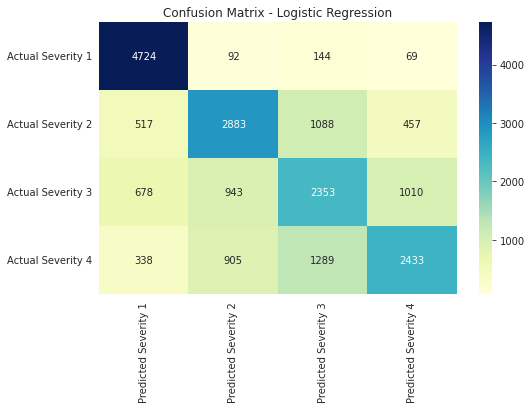

In [126]:
y_pred = lr.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

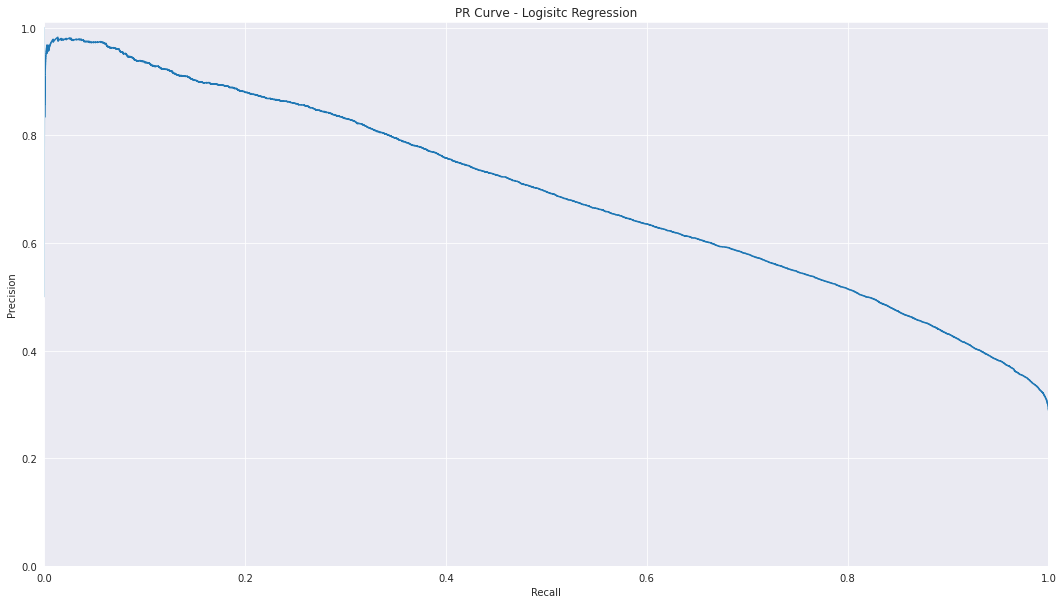

In [127]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = lr.predict_proba(X_validate)

precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logisitc Regression")
plt.show()

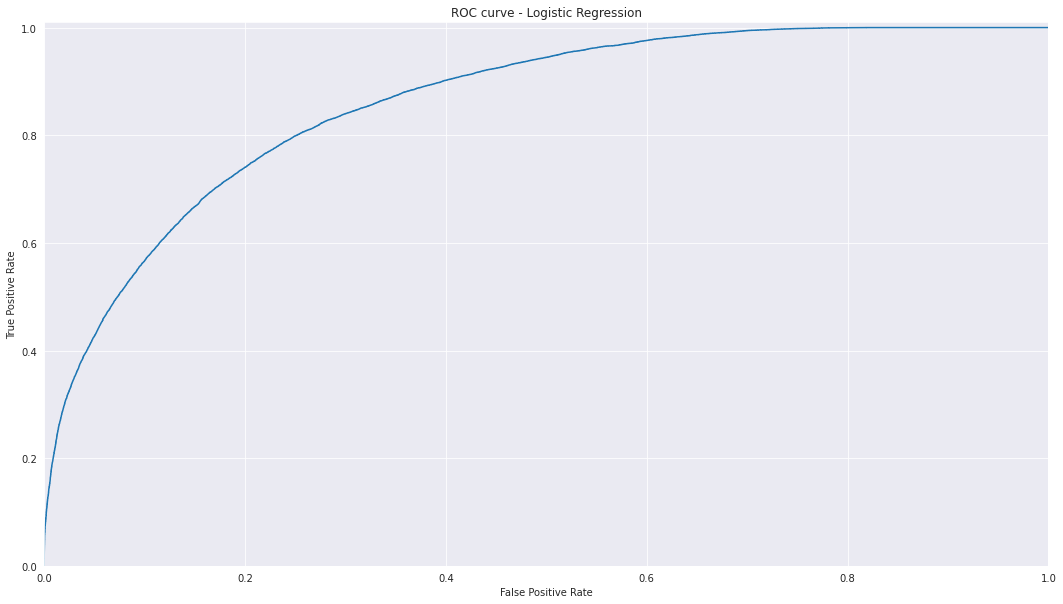

In [128]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

<a id="4.2"></a>
## 2 Decision Tree

In [129]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(59769, 60) (59769,)
(19923, 60) (19923,)


In [130]:
dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters scores:
{'criterion': 'entropy', 'max_depth': 10}
Train score: 0.72514179591427
Validation score: 0.7047131456106008


In [131]:
print("Default scores:")
dtc.fit(X_train, y_train)
print("Train score:", dtc.score(X_train, y_train))
print("Validation score:", dtc.score(X_validate, y_validate))

Default scores:
Train score: 0.9998494202680319
Validation score: 0.6682226572303368


In [132]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,1.269707,0.012749,0.014059,0.001160,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.710223,0.704701,0.701272,0.709051,0.700745,0.705198,0.003888,1
1,0.953614,0.014978,0.011913,0.000723,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.706876,0.692990,0.702443,0.699097,0.705095,0.701300,0.004914,2
6,1.810320,0.019148,0.014367,0.000806,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.701188,0.701857,0.696252,0.697423,0.698737,0.699091,0.002145,3
2,1.340781,0.013301,0.014863,0.002380,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.704116,0.697423,0.692488,0.694914,0.699992,0.697787,0.004034,4
7,2.135886,0.242827,0.014334,0.001801,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.672160,0.667894,0.674335,0.675757,0.668786,0.671786,0.003051,5
3,1.699587,0.018170,0.016074,0.001267,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.675841,0.670654,0.667643,0.665049,0.669121,0.669662,0.003600,6
0,0.506787,0.020253,0.011005,0.000606,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.669901,0.652669,0.663125,0.664129,0.655400,0.661045,0.006234,7
4,0.654966,0.011977,0.012927,0.000997,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.647398,0.650661,0.648319,0.649573,0.650966,0.649383,0.001360,8


In [133]:
y_pred = dtc.predict(X_validate)

accuracy["Decision Tree"] = accuracy_score(y_validate, y_pred)
f1["Decision Tree"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14845
           2       1.00      1.00      1.00     14939
           3       1.00      1.00      1.00     14966
           4       1.00      1.00      1.00     15019

    accuracy                           1.00     59769
   macro avg       1.00      1.00      1.00     59769
weighted avg       1.00      1.00      1.00     59769

              precision    recall  f1-score   support

           1       0.88      0.88      0.88      5029
           2       0.65      0.64      0.64      4945
           3       0.55      0.54      0.54      4984
           4       0.60      0.60      0.60      4965

    accuracy                           0.67     19923
   macro avg       0.67      0.67      0.67     19923
weighted avg       0.67      0.67      0.67     19923



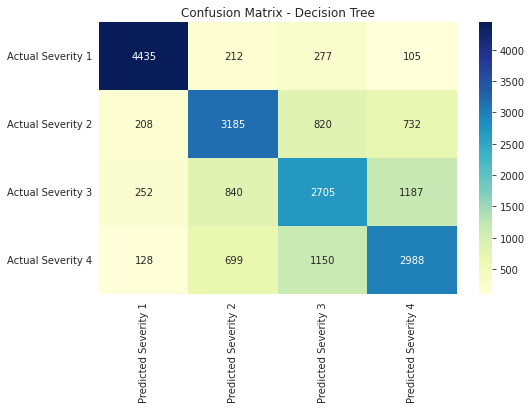

In [134]:
y_pred = dtc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

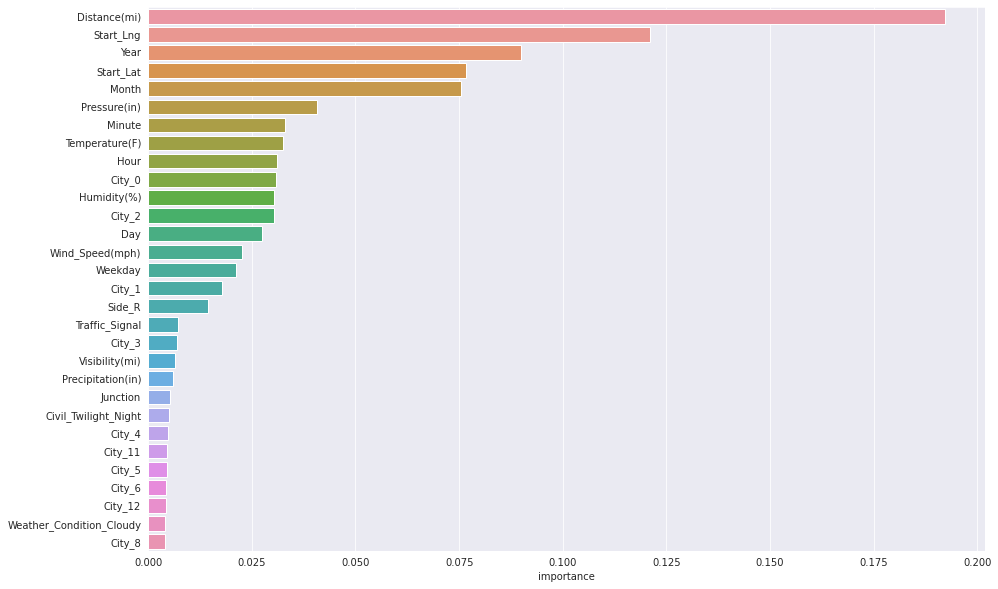

In [135]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = dtc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

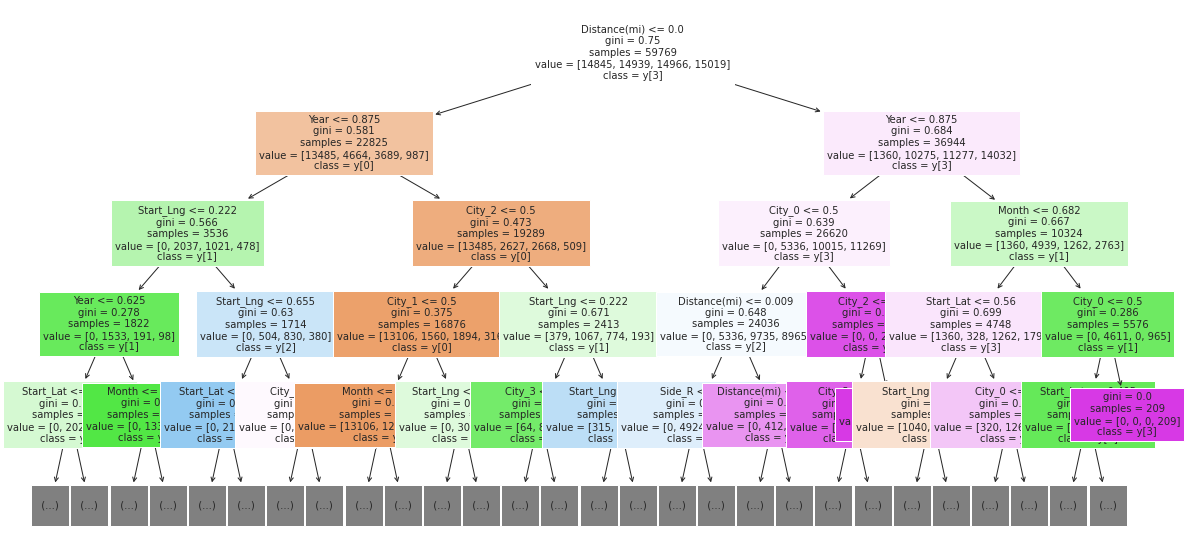

In [136]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dtc, max_depth=4, fontsize=10, feature_names=X_train.columns.to_list(), class_names = True, filled=True)
plt.show()

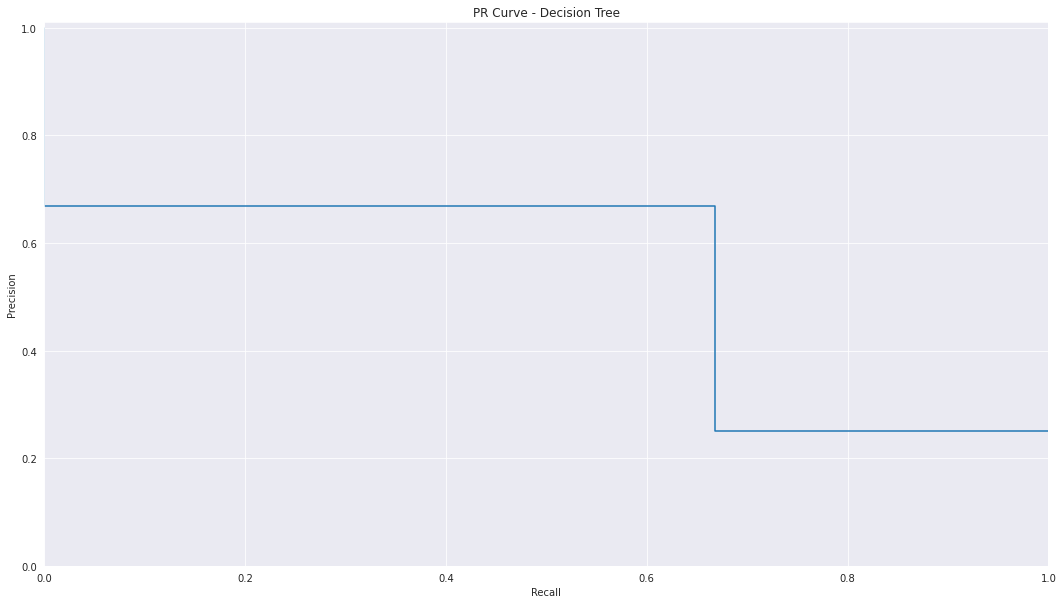

In [137]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = dtc.predict_proba(X_validate)

precision["Decision Tree"], recall["Decision Tree"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Decision Tree"], precision["Decision Tree"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Decision Tree")
plt.show()

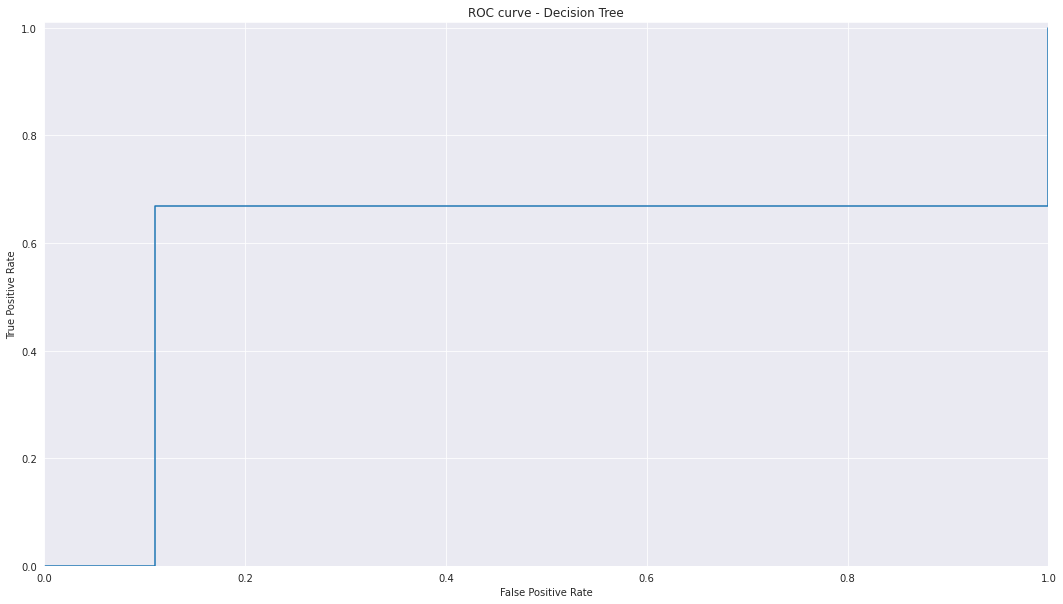

In [138]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Decision Tree"], tpr["Decision Tree"], where="post")

plt.title("ROC curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

<a id="4.3"></a>
## 3 Random Forest

In [139]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(59769, 60) (59769,)
(19923, 60) (19923,)


In [140]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters scores:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.999765764861383
Validation score: 0.7488832003212368


In [141]:
print("Default scores:")
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_validate, y_validate))

Default scores:
Train score: 0.9998494202680319
Validation score: 0.7421071123826732


In [142]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,82.804731,13.207914,3.423972,0.823335,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.754726,0.746779,0.748954,0.745943,0.746507,0.748582,0.003238,1
14,37.360026,0.722400,1.677666,0.074553,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.751129,0.741342,0.746445,0.744521,0.745503,0.745788,0.003175,2
13,18.366811,0.125694,0.866537,0.044468,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.747365,0.739585,0.742931,0.743684,0.742240,0.743161,0.002515,3
12,9.448924,0.266125,0.480654,0.041589,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.740589,0.735904,0.733311,0.736490,0.737053,0.736670,0.002341,4
11,70.531839,0.996170,2.942246,0.113411,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.741760,0.734399,0.734733,0.734148,0.734042,0.735816,0.002981,5
10,28.661407,0.455524,1.238829,0.082237,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.742931,0.733562,0.733060,0.731722,0.734460,0.735147,0.003992,6
9,14.008839,0.108794,0.571842,0.052240,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.739501,0.729630,0.732474,0.731889,0.734544,0.733608,0.003337,7
8,7.114567,0.122229,0.394294,0.055761,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.735319,0.728292,0.730885,0.727539,0.729022,0.730211,0.002785,8
7,50.340804,2.111792,1.971727,0.122455,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.712899,0.706876,0.706542,0.708800,0.706015,0.708227,0.002519,9
6,19.662931,0.188144,0.880891,0.057929,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.711059,0.702610,0.708884,0.709051,0.706768,0.707675,0.002873,10


In [143]:
y_pred = rfc.predict(X_validate)

accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
f1["Random Forest"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14845
           2       1.00      1.00      1.00     14939
           3       1.00      1.00      1.00     14966
           4       1.00      1.00      1.00     15019

    accuracy                           1.00     59769
   macro avg       1.00      1.00      1.00     59769
weighted avg       1.00      1.00      1.00     59769

              precision    recall  f1-score   support

           1       0.87      0.97      0.91      5029
           2       0.77      0.67      0.72      4945
           3       0.63      0.64      0.63      4984
           4       0.69      0.69      0.69      4965

    accuracy                           0.74     19923
   macro avg       0.74      0.74      0.74     19923
weighted avg       0.74      0.74      0.74     19923



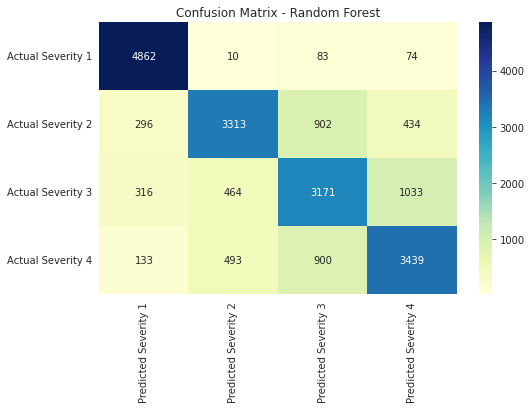

In [144]:
y_pred = rfc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

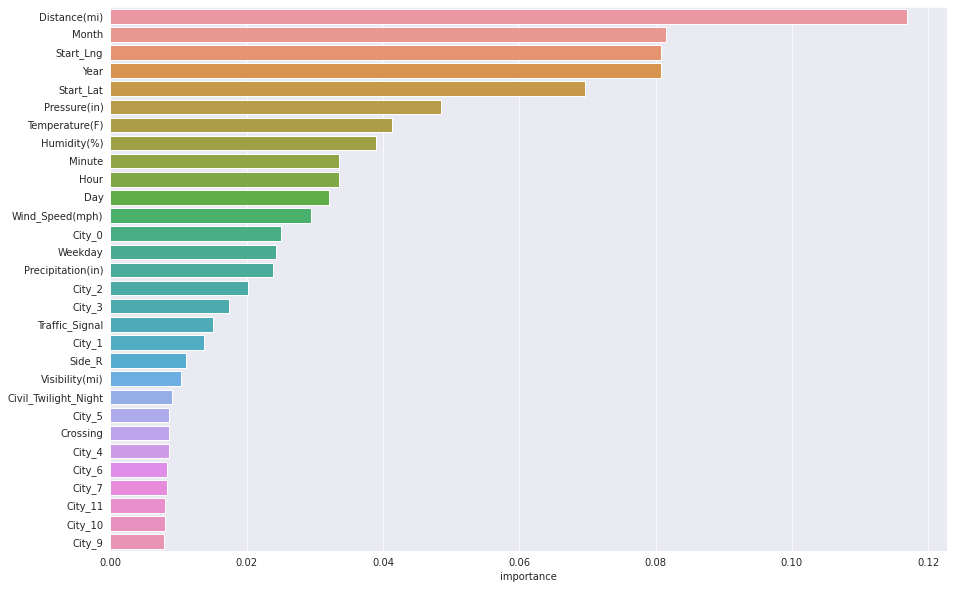

In [145]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

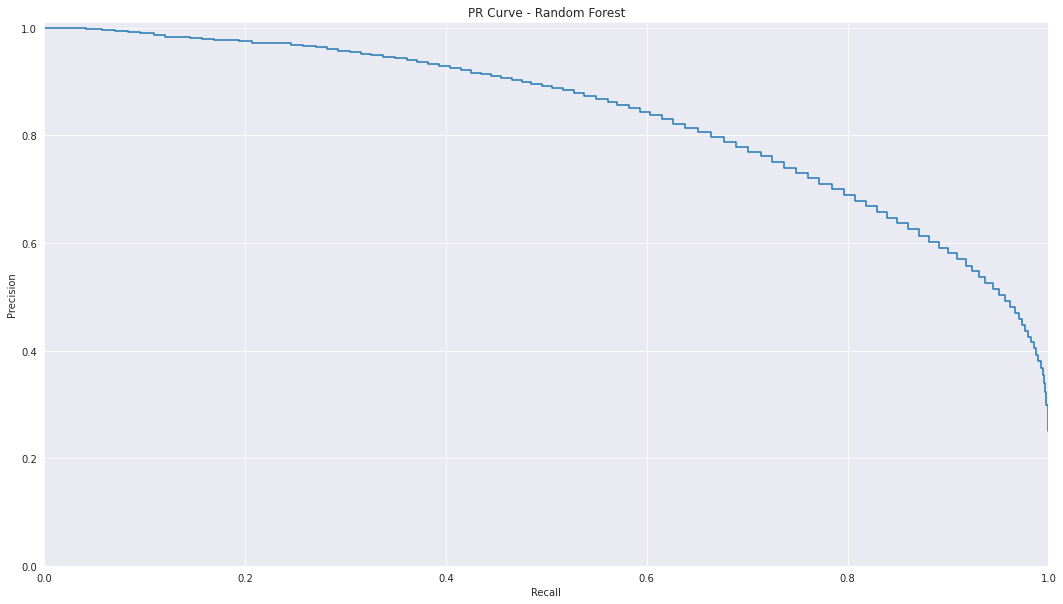

In [146]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = rfc.predict_proba(X_validate)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

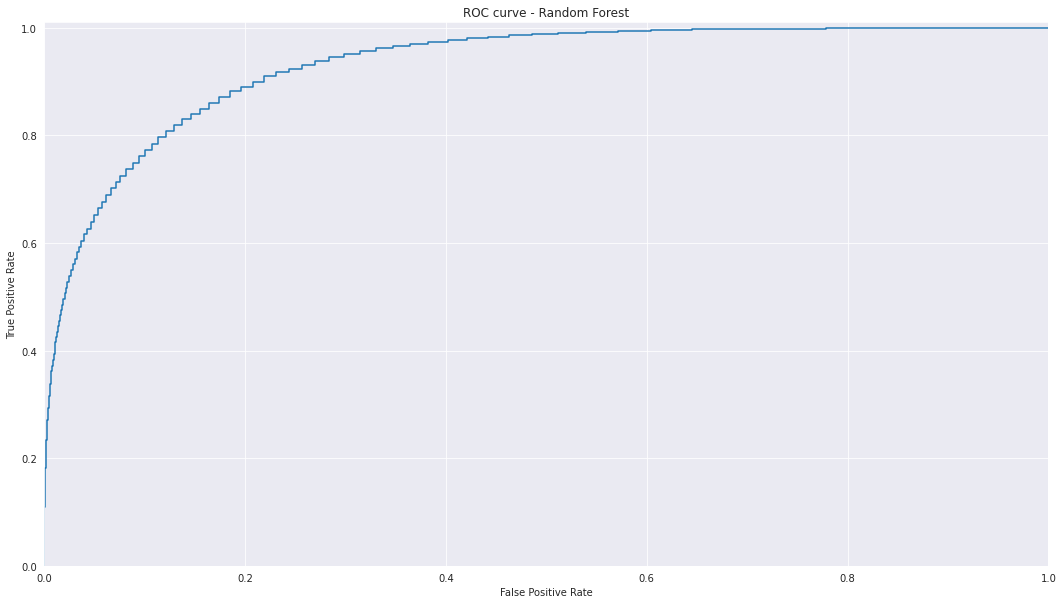

In [147]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

<a id="5"></a>
# Results

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


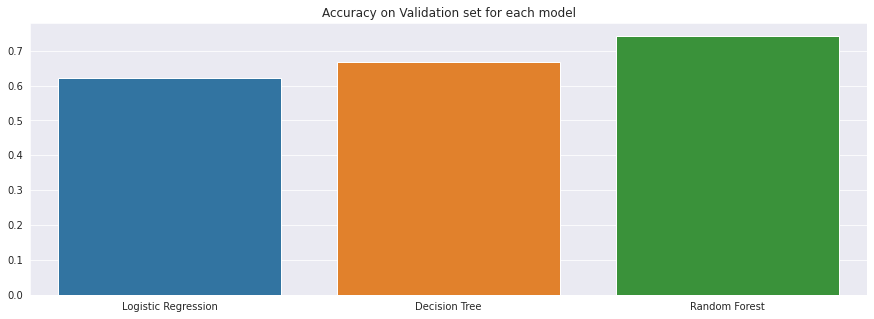

In [148]:
plt.figure(figsize=(15, 5))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


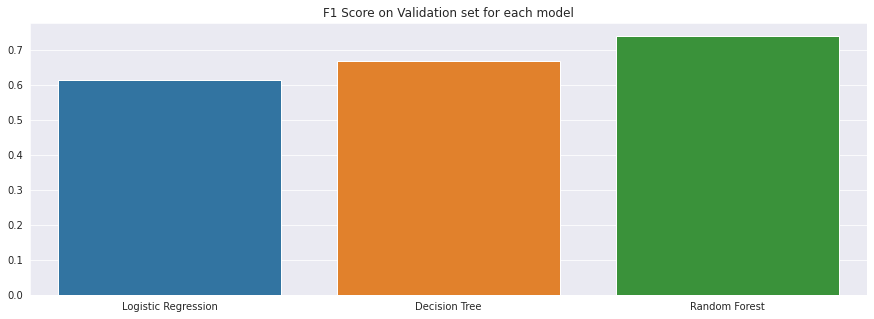

In [149]:
plt.figure(figsize=(15,5))
plt.title("F1 Score on Validation set for each model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

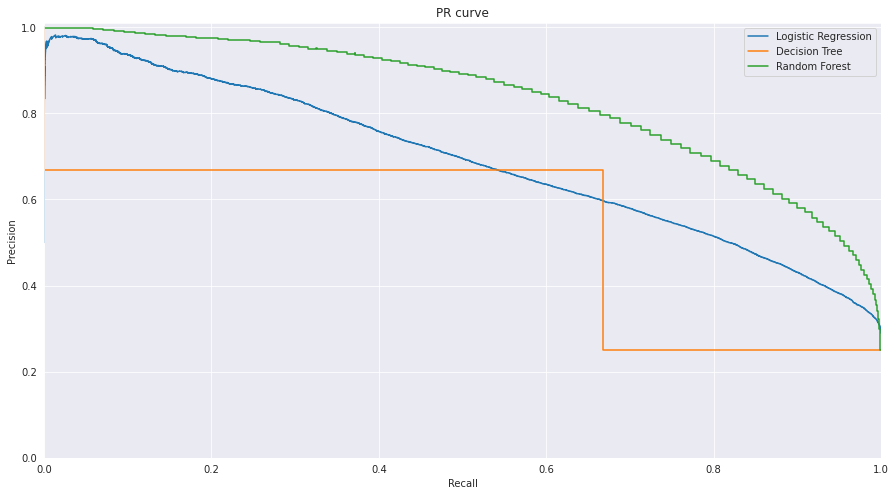

In [150]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.show()

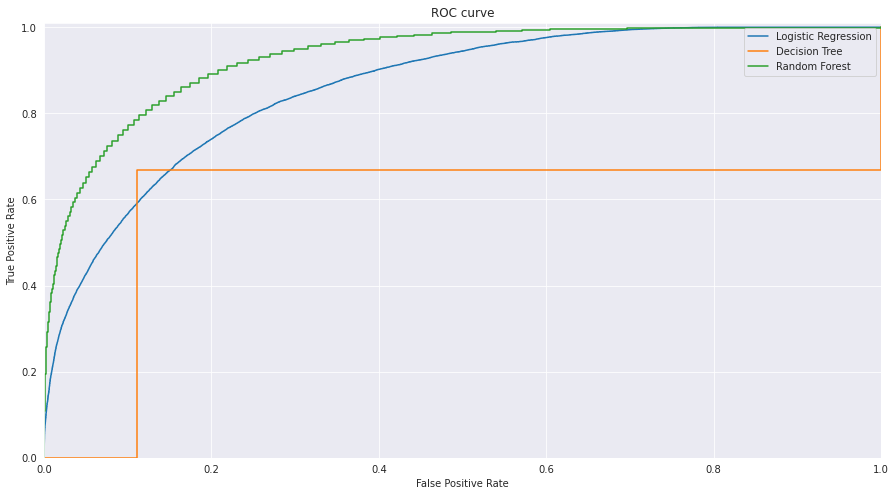

In [151]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           1       0.87      0.96      0.92      5030
           2       0.77      0.66      0.71      5020
           3       0.62      0.64      0.63      4954
           4       0.70      0.70      0.70      4920

    accuracy                           0.74     19924
   macro avg       0.74      0.74      0.74     19924
weighted avg       0.74      0.74      0.74     19924



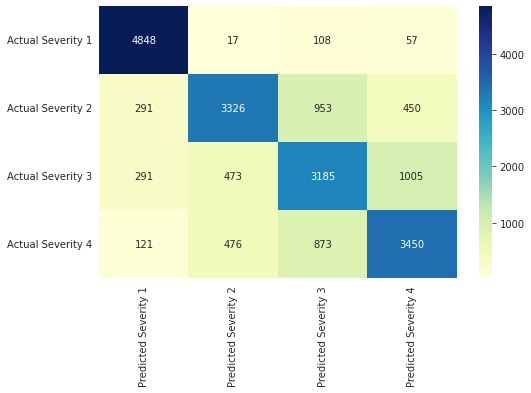

In [152]:
sample = X_test
y_test_sample = sample["Severity"]
X_test_sample = sample.drop("Severity", axis=1)

y_pred = rfc.predict(X_test_sample)

print(classification_report(y_test_sample, y_pred))

confmat = confusion_matrix(y_true=y_test_sample, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()